### AML2203 - Advanced Python AI and ML Tools - Final Project

__Group Members:__
1) Aanal Patel - C0910376
2) Aniketh Vaglapuram - C0903304
3) Bimal Shresta - C0919385
4) Danilo Diaz - C0889539
5) Ernie Sumoso - C0881591 
6) Siddharth Yadav - C0907985

### 1. EDA

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

Loading the dataset from the our scraped files

In [2]:
# read dataset from csv file
df = pd.read_csv('matches_1000.csv')

# displaying the raw data
df.tail()

match_id  start_time  radiant_team_id        radiant_name  \
995  7646061364  1710927713        9330485.0        BulletProofs   
996  7646029532  1710925568        8629318.0         Mad Monkeys   
997  7646024029  1710925131        8597976.0               Talon   
998  7646023923  1710925122        8668460.0  Blacklist Rivalry    
999  7646022906  1710925049        8936507.0           FenixTeam   

     dire_team_id         dire_name  leagueid  \
995     8893837.0  Parallel eSports     15819   
996     8629324.0     Swift Knights     16059   
997     8254145.0        Execration     16390   
998     9264152.0     MAG Indonesia     16390   
999     8893840.0   Big Bang Gaming     15819   

                                           league_name  series_type  \
995                                    Ancients League            1   
996                                     Destiny League            1   
997  DreamLeague Season 23 Qualifiers Powered by Intel            1   
998  DreamLeague Season 23 Qualifiers Powered by Intel            1   
999                                    Ancients League            1   

     radiant_win  ...  team2_hero1_gamesPlayed  team2_hero1_wins  \
995         True  ...                     48.0              25.0   
996         True  ...                    442.0             221.0   
997         True  ...                     39.0              20.0   
998         True  ...                     15.0               8.0   
999        False  ...                    136.0              76.0   

     team2_hero2_gamesPlayed  team2_hero2_wins  team2_hero3_gamesPlayed  \
995                     67.0              42.0                     29.0   
996                    213.0             105.0                    237.0   
997                     40.0              23.0                     53.0   
998                     16.0               9.0                     31.0   
999                     58.0              32.0                     37.0   

     team2_hero3_wins  team2_hero4_gamesPlayed  team2_hero4_wins  \
995              17.0                     53.0              22.0   
996             123.0                    159.0              88.0   
997              31.0                     50.0              26.0   
998              19.0                     11.0               8.0   
999              24.0                     93.0              55.0   

     team2_hero5_gamesPlayed  team2_hero5_wins  
995                    107.0              71.0  
996                    104.0              39.0  
997                     47.0              22.0  
998                      3.0               0.0  
999                     70.0              40.0  

[5 rows x 95 columns]

In [3]:
# show shape and column names
def display_shape_and_colnames(df, colnames=True):
    print("# Rows:", df.shape[0])
    print("# Columns:", df.shape[1])
    if colnames: print("Column names:", df.columns)

display_shape_and_colnames(df)

# Rows: 1000
# Columns: 95
Column names: Index(['match_id', 'start_time', 'radiant_team_id', 'radiant_name',
       'dire_team_id', 'dire_name', 'leagueid', 'league_name', 'series_type',
       'radiant_win', 'region', 'team2_ban1', 'team1_ban1', 'team1_ban2',
       'team2_ban2', 'team1_ban3', 'team1_ban4', 'team2_ban3', 'team2_hero1',
       'team1_hero1', 'team2_ban4', 'team2_ban5', 'team1_ban5', 'team1_hero2',
       'team2_hero2', 'team2_hero3', 'team1_hero3', 'team1_hero4',
       'team2_hero4', 'team2_ban6', 'team1_ban6', 'team1_ban7', 'team2_ban7',
       'team2_hero5', 'team1_hero5', 'team1_id', 'team1_rating', 'team1_wins',
       'team1_losses', 'team1_last_match_time', 'team2_id', 'team2_rating',
       'team2_wins', 'team2_losses', 'team2_last_match_time',
       'team1_player1_id', 'team1_player1_gamesPlayed', 'team1_player1_wins',
       'team1_player2_id', 'team1_player2_gamesPlayed', 'team1_player2_wins',
       'team1_player3_id', 'team1_player3_gamesPlayed', 'team1_p

In [4]:
# display column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 95 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   match_id                   1000 non-null   int64  
 1   start_time                 1000 non-null   int64  
 2   radiant_team_id            985 non-null    float64
 3   radiant_name               969 non-null    object 
 4   dire_team_id               984 non-null    float64
 5   dire_name                  969 non-null    object 
 6   leagueid                   1000 non-null   int64  
 7   league_name                1000 non-null   object 
 8   series_type                1000 non-null   int64  
 9   radiant_win                1000 non-null   bool   
 10  region                     968 non-null    float64
 11  team2_ban1                 982 non-null    float64
 12  team1_ban1                 982 non-null    float64
 13  team1_ban2                 982 non-null    float6

In [5]:
# display dataset statistic description
df.describe()

match_id    start_time  radiant_team_id  dire_team_id  \
count  1.000000e+03  1.000000e+03     9.850000e+02  9.840000e+02   
mean   7.653690e+09  1.711338e+09     8.262297e+06  8.238466e+06   
std    4.316900e+06  2.319333e+05     2.198489e+06  2.274647e+06   
min    7.646023e+09  1.710925e+09     5.000000e+00  5.000000e+00   
25%    7.649674e+09  1.711128e+09     8.629014e+06  8.629014e+06   
50%    7.654169e+09  1.711356e+09     8.894818e+06  8.957156e+06   
75%    7.657224e+09  1.711533e+09     9.330492e+06  9.330485e+06   
max    7.661062e+09  1.711737e+09     9.389538e+06  9.389538e+06   

           leagueid  series_type      region  team2_ban1  team1_ban1  \
count   1000.000000  1000.000000  968.000000  982.000000  982.000000   
mean   16185.148000     1.024000    6.422521   72.303462   71.229124   
std      246.919192     0.288977    6.473411   33.599026   33.463133   
min    15819.000000     0.000000    2.000000    1.000000    1.000000   
25%    15901.000000     1.000000    3.000000   49.000000   49.000000   
50%    16249.500000     1.000000    3.000000   72.500000   66.000000   
75%    16390.000000     1.000000    8.000000   98.000000   98.000000   
max    16527.000000     2.000000   38.000000  137.000000  138.000000   

       team1_ban2  ...  team2_hero1_gamesPlayed  team2_hero1_wins  \
count  982.000000  ...               950.000000        950.000000   
mean    68.000000  ...                55.660000         28.913684   
std     34.115054  ...                80.967914         40.733979   
min      1.000000  ...                 1.000000          0.000000   
25%     43.000000  ...                 7.000000          4.000000   
50%     66.000000  ...                24.000000         12.000000   
75%     98.000000  ...                75.000000         39.000000   
max    137.000000  ...               461.000000        226.000000   

       team2_hero2_gamesPlayed  team2_hero2_wins  team2_hero3_gamesPlayed  \
count               950.000000        950.000000               950.000000   
mean                 51.255789         26.644211                41.923158   
std                  79.549051         40.842804                60.985301   
min                   1.000000          0.000000                 1.000000   
25%                   7.000000          4.000000                 6.000000   
50%                  20.000000         11.000000                18.000000   
75%                  63.000000         33.000000                53.000000   
max                 548.000000        266.000000               548.000000   

       team2_hero3_wins  team2_hero4_gamesPlayed  team2_hero4_wins  \
count        950.000000               950.000000        950.000000   
mean          21.922105                41.730526         21.841053   
std           32.090169                60.606011         32.566039   
min            0.000000                 1.000000          0.000000   
25%            3.000000                 5.000000          3.000000   
50%            9.000000                17.000000          8.000000   
75%           28.000000                50.000000         25.750000   
max          266.000000               548.000000        266.000000   

       team2_hero5_gamesPlayed  team2_hero5_wins  
count               950.000000        950.000000  
mean                 38.104211         19.845263  
std                  55.140196         29.021889  
min                   1.000000          0.000000  
25%                   4.000000          2.000000  
50%                  15.000000          7.000000  
75%                  51.750000         27.000000  
max                 548.000000        266.000000  

[8 rows x 91 columns]

Changing the data type of datetime columns:
- start time
- team 1 last match time
- team 2 last match time

In [6]:
# set the datetime columns into datetime
def convert_columns_to_datatime(columns):
    for column in columns:
        df[column] = pd.to_datetime(df[column], unit='s')

date_columns = ['start_time', 'team1_last_match_time', 'team2_last_match_time']
convert_columns_to_datatime(date_columns)
df[date_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   start_time             1000 non-null   datetime64[ns]
 1   team1_last_match_time  959 non-null    datetime64[ns]
 2   team2_last_match_time  959 non-null    datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 23.6 KB


In [7]:
# identifying numerical columns
def get_numerical_columns(df):
    numeric_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    return df.select_dtypes(include=numeric_types).columns.to_list()

numeric_columns = get_numerical_columns(df)
print("# Numerical columns:", len(numeric_columns))
print("Numeric columns:", numeric_columns)

# Numerical columns: 88
Numeric columns: ['match_id', 'radiant_team_id', 'dire_team_id', 'leagueid', 'series_type', 'region', 'team2_ban1', 'team1_ban1', 'team1_ban2', 'team2_ban2', 'team1_ban3', 'team1_ban4', 'team2_ban3', 'team2_hero1', 'team1_hero1', 'team2_ban4', 'team2_ban5', 'team1_ban5', 'team1_hero2', 'team2_hero2', 'team2_hero3', 'team1_hero3', 'team1_hero4', 'team2_hero4', 'team2_ban6', 'team1_ban6', 'team1_ban7', 'team2_ban7', 'team2_hero5', 'team1_hero5', 'team1_id', 'team1_rating', 'team1_wins', 'team1_losses', 'team2_id', 'team2_rating', 'team2_wins', 'team2_losses', 'team1_player1_id', 'team1_player1_gamesPlayed', 'team1_player1_wins', 'team1_player2_id', 'team1_player2_gamesPlayed', 'team1_player2_wins', 'team1_player3_id', 'team1_player3_gamesPlayed', 'team1_player3_wins', 'team1_player4_id', 'team1_player4_gamesPlayed', 'team1_player4_wins', 'team1_player5_id', 'team1_player5_gamesPlayed', 'team1_player5_wins', 'team2_player1_id', 'team2_player1_gamesPlayed', 'team2_p

In [8]:
# identifying non-numerical columns
def get_non_numerical_columns(df):
    numeric_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    return df.select_dtypes(exclude=numeric_types).columns.to_list()

non_numeric_columns = get_non_numerical_columns(df)
print("# Non-numerical columns:", len(non_numeric_columns))
print("Non-numeric columns:", non_numeric_columns)

# Non-numerical columns: 7
Non-numeric columns: ['start_time', 'radiant_name', 'dire_name', 'league_name', 'radiant_win', 'team1_last_match_time', 'team2_last_match_time']


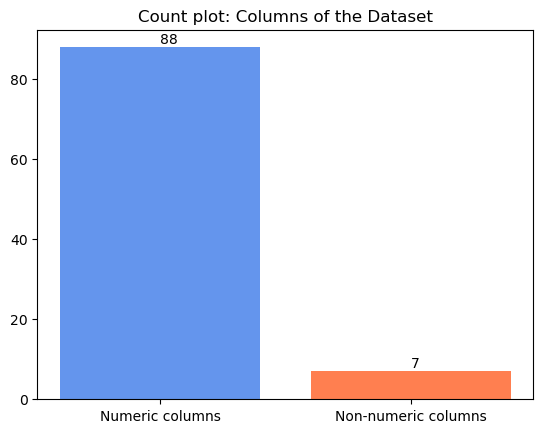

In [9]:
# plot numeric vs non-numeric columns count
def plot_column_counts(df):
    # get column names
    numeric_columns = get_numerical_columns(df)
    non_numeric_columns = get_non_numerical_columns(df)
    
    # plot the bar chart
    data = [('Numeric columns', len(numeric_columns)), ('Non-numeric columns', len(non_numeric_columns))]
    plt.bar(x=[x[0] for x in data ], height=[y[1] for y in data], color=['cornflowerblue', 'coral'])
    plt.title("Count plot: Columns of the Dataset")
    
    # annotate values into the plot
    max_y = max([y[1] for y in data])
    for i, (x, y) in enumerate(data):
        plt.annotate(str(y), (i, y + 0.01 * max_y))
    plt.show()

plot_column_counts(df)

In [10]:
# checking number & percentage of missing values per column
def check_overall_missing_values(df):
    mean = np.mean(df.isna().sum())
    median = np.median(df.isna().sum())
    total = df.shape[0] - df.dropna().shape[0]
    print(f"Average of Missing Values per column: {mean:.2f}")
    print(f"Median of Missing Values per column: {median:.0f}")
    print(f"% Average of Missing Values: {mean*100/df.shape[0]:.2f} %")
    print(f"% Median of Missing Values: {median*100/df.shape[0]:.2f} %")
    print(f"Total Missing Values on dataset: {total}")
    print(f"Total Missing Values on dataset: {total*100/df.shape[0]:.2f} %")
    
check_overall_missing_values(df)

Average of Missing Values per column: 30.54
Median of Missing Values per column: 41
% Average of Missing Values: 3.05 %
% Median of Missing Values: 4.10 %
Total Missing Values on dataset: 90
Total Missing Values on dataset: 9.00 %


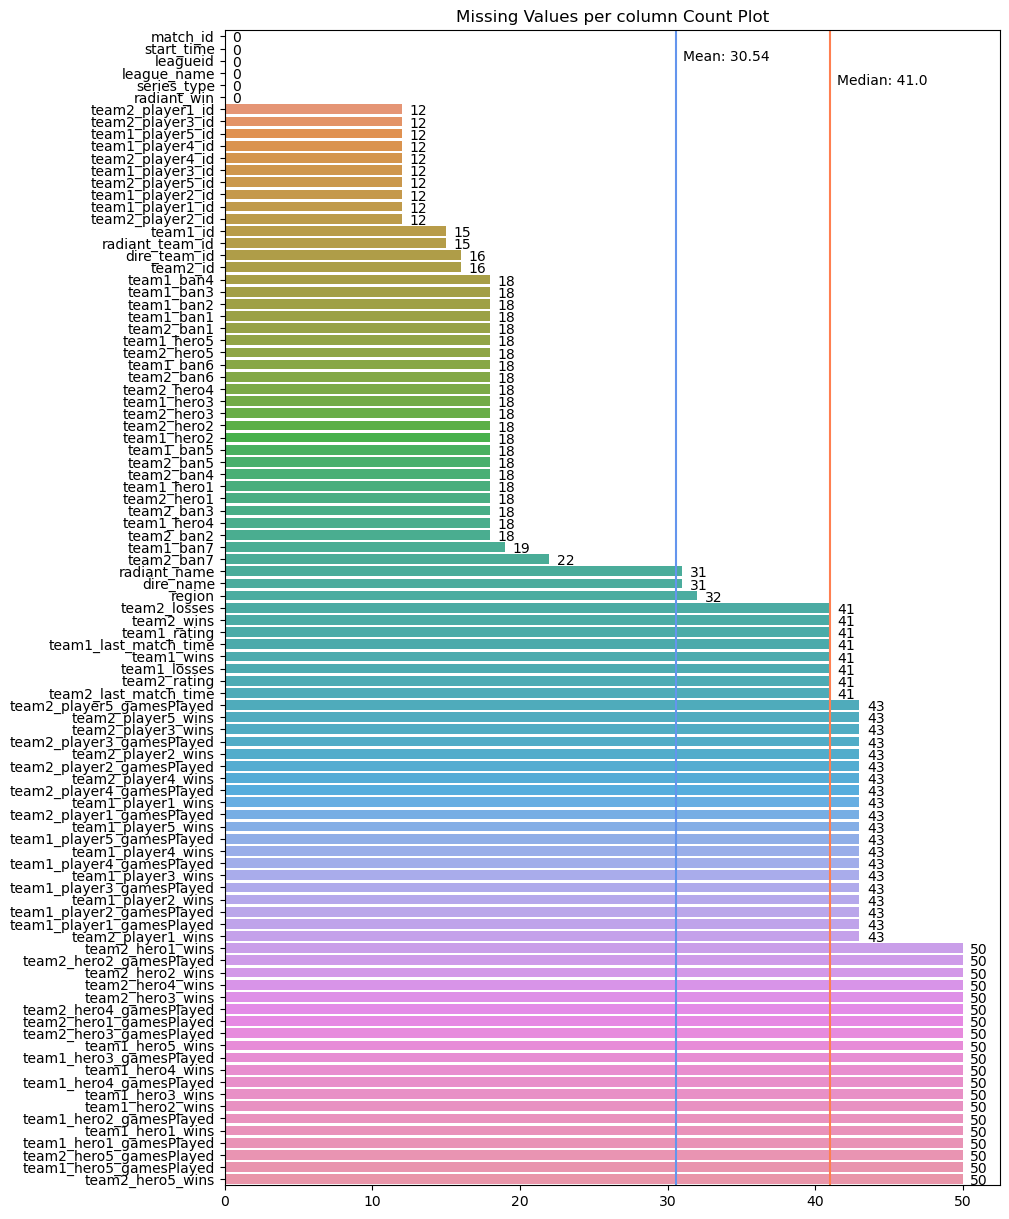

In [11]:
# plot bars of missing values (or unique values) per column, with mean and median lines
def plot_column_values(df, counting='missing_values'):
    # set the values and plot the column counts
    plt.figure(figsize=(10,15))
    if counting == "missing_values":
        values = df.isna().sum().sort_values(ascending=True)
    elif counting == "unique_values":
        values = df.nunique().sort_values(ascending=True)
    column_names = values.index
    sns.barplot(x=values, y=column_names)

    # plot mean and median lines
    mean = np.mean(values)
    median = np.median(values)
    plt.axvline(x=mean, color='cornflowerblue')
    plt.axvline(x=median, color='coral')
    plt.annotate("Mean: "+str(round(mean, 2)), (0.5 + mean, 2))
    plt.annotate("Median: "+str(median), (0.5 + median, 4))

    # annotate values into the plot
    max_x = max(values)
    for i, (missing_value, column) in enumerate(zip(values, column_names)):
        plt.annotate(str(missing_value), (missing_value + 0.01 * max_x, i + 0.5))
    plt.title(counting.replace("_"," ").title() + " per column Count Plot")
    plt.show()
    
plot_column_values(df, 'missing_values')

In [12]:
# check for number and % of duplicated rows
def check_duplicated_values(df):
    print("# Dupleicated Values:", df.duplicated().sum())
    print("% Duplicated Values:", df.duplicated().mean() * 100, "%")

check_duplicated_values(df)

# Dupleicated Values: 0
% Duplicated Values: 0.0 %


In [13]:
# check number and % of unique values per column
def check_overall_unique_values(df):
    mean = np.mean(df.nunique())
    median = np.median(df.nunique())
    print(f"Average of Unique Values per column: {mean:.2f}")
    print(f"Median of Unique Values per column: {median:.0f}")
    print(f"% Average of Unique Values per column (vs total rows): {mean*100/df.shape[0]:.2f} %")
    print(f"% Median of Unique Values per column (vs total rows): {median*100/df.shape[0]:.2f} %")
        
check_overall_unique_values(df)

Average of Unique Values per column: 162.51
Median of Unique Values per column: 126
% Average of Unique Values per column (vs total rows): 16.25 %
% Median of Unique Values per column (vs total rows): 12.60 %


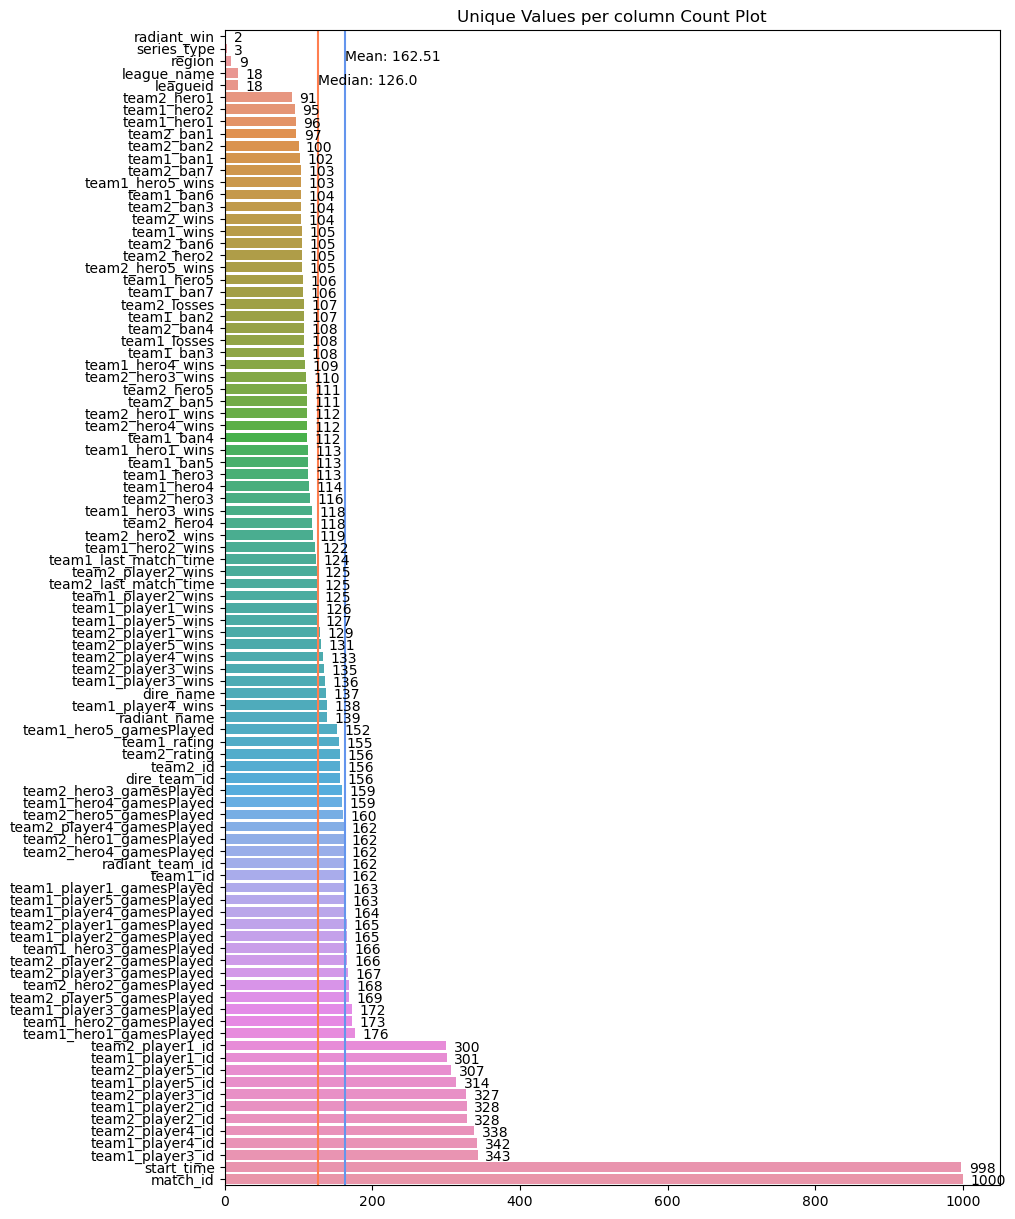

In [14]:
plot_column_values(df, 'unique_values')

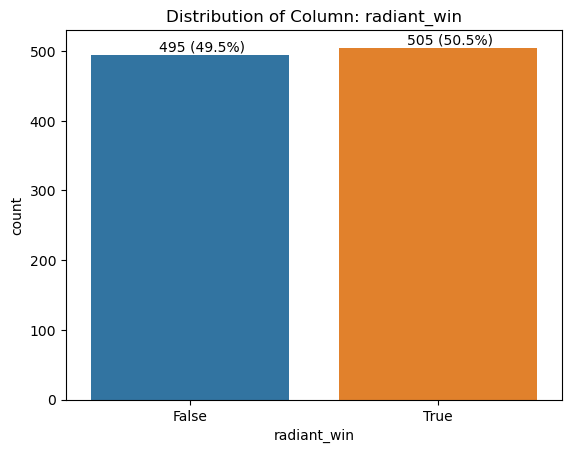

In [15]:
# check target value distribution
def plot_column_distribution_countplot(df, column):
    # plot column countplots
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of Column: {column}')
    
    # annotate counts
    for i, value in enumerate(df[column].value_counts().sort_values()):
        percentage = round(value * 100 / df.shape[0], 2)
        plt.annotate(str(value) + f" ({percentage}%)", (i - 0.125, value + 5))
    plt.show()

plot_column_distribution_countplot(df, 'radiant_win')

Our target values look totally balanced. Let's plot our column distributions

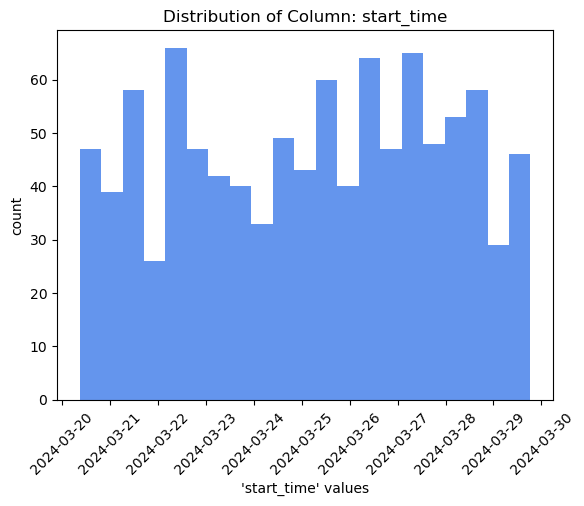

In [16]:
# check target value distribution
def plot_column_distribution_histogram(df, column, rotation=0, bins=21, color='cornflowerblue'):
    # draw plot and set labels & title
    plt.hist(df[column], bins=bins, color=color)
    plt.xticks(rotation=rotation)
    plt.xlabel("'" + column + "' values")
    plt.ylabel('count')
    plt.title(f'Distribution of Column: {column}')
    plt.show()
    
plot_column_distribution_histogram(df, 'start_time', rotation=45)

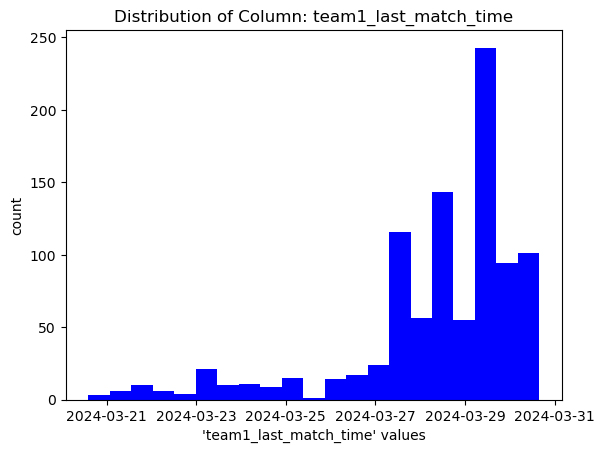

In [17]:
plot_column_distribution_histogram(df, 'team1_last_match_time', color='b')

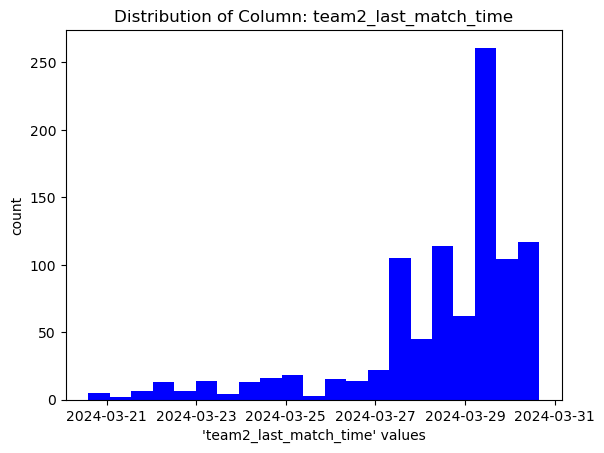

In [18]:
plot_column_distribution_histogram(df, 'team2_last_match_time', color='b')

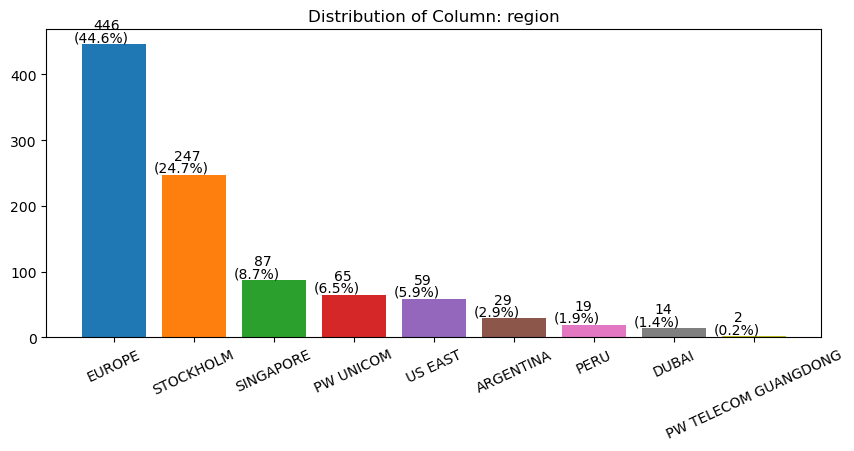

In [19]:
# check more column distributions
def plot_column_distribution_bar(df, target, rotation=0, constants={}, figsize=(10, 5)):
    # plot column countplots
    frequencies = df[target].value_counts()
    unique_values = frequencies.index
    
    # map the x-axis values if parameter constants was set
    if constants != {}:
        unique_values = [constants[str(int(value))] for value in unique_values if not math.isnan(value)]
    unique_values = [value[:22] for value in unique_values]
    plt.figure(figsize=figsize)
    plt.bar(x=unique_values, height=frequencies, color=mcolors.TABLEAU_COLORS)
    plt.title(f'Distribution of Column: {target}')
    plt.xticks(rotation=rotation)
    
    # annotate frequencies and percentages
    max_y = max(frequencies)
    for i, (value, frequency) in enumerate(zip(unique_values, frequencies)):
        percentage = round(frequency * 100 / df.shape[0], 2)
        plt.annotate(str(frequency), (i - 0.25, frequency + max_y * 0.05))
        plt.annotate(f"({percentage}%)", (i - 0.5, frequency + max_y * 0.01))
    plt.show()
    
regions_constants = {"1":"US WEST","2":"US EAST","3":"EUROPE","5":"SINGAPORE","6":"DUBAI","7":"AUSTRALIA","8":"STOCKHOLM","9":"AUSTRIA","10":"BRAZIL","11":"SOUTHAFRICA","12":"PW TELECOM SHANGHAI","13":"PW UNICOM","14":"CHILE","15":"PERU","16":"INDIA","17":"PW TELECOM GUANGDONG","18":"PW TELECOM ZHEJIANG","19":"JAPAN","20":"PW TELECOM WUHAN","25":"PW UNICOM TIANJIN","37":"TAIWAN","38":"ARGENTINA"}
plot_column_distribution_bar(df, 'region', rotation=25, constants=regions_constants, figsize=(10, 4))

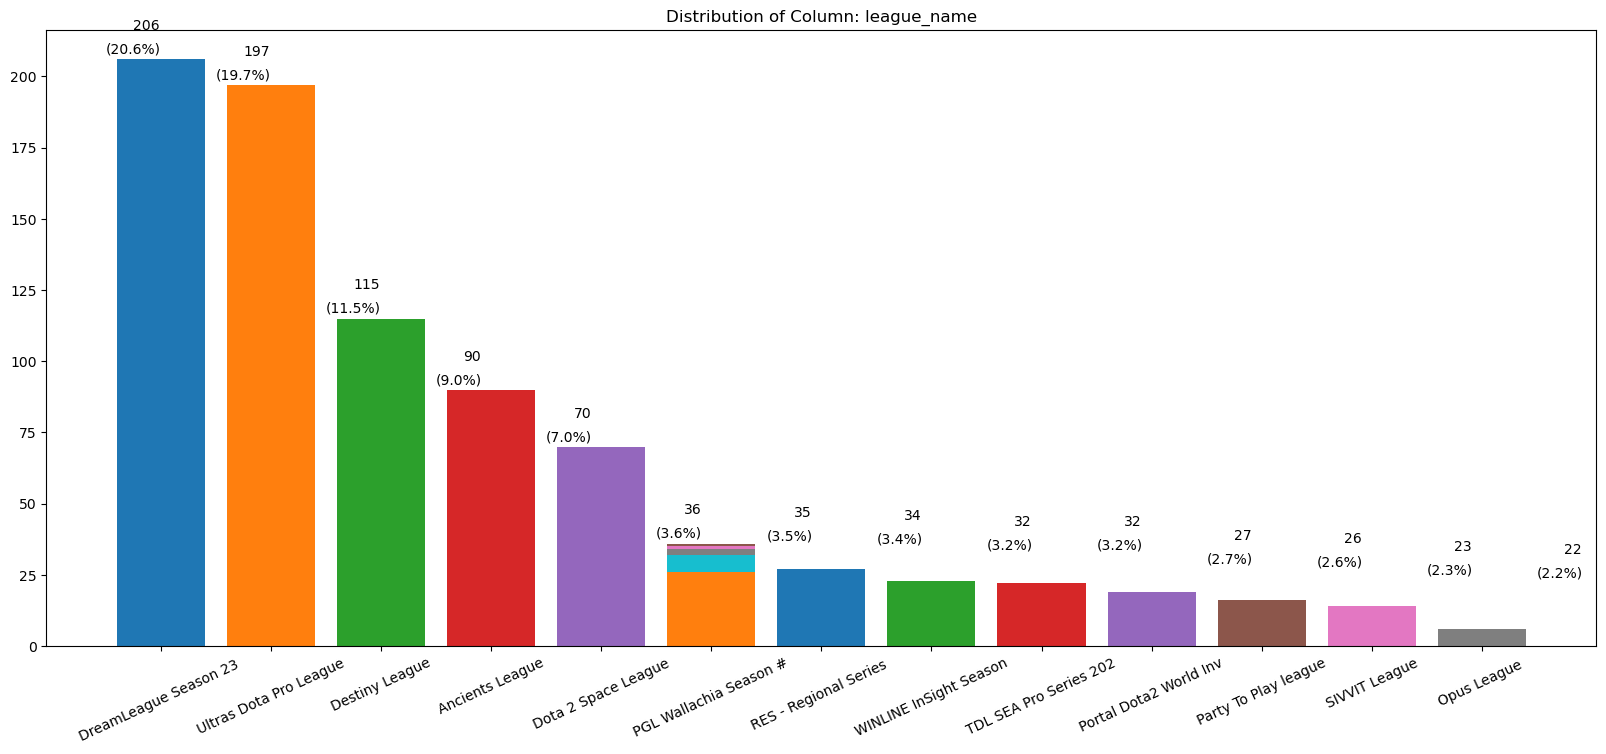

In [20]:
plot_column_distribution_bar(df, 'league_name', rotation=25, figsize=(20, 8))

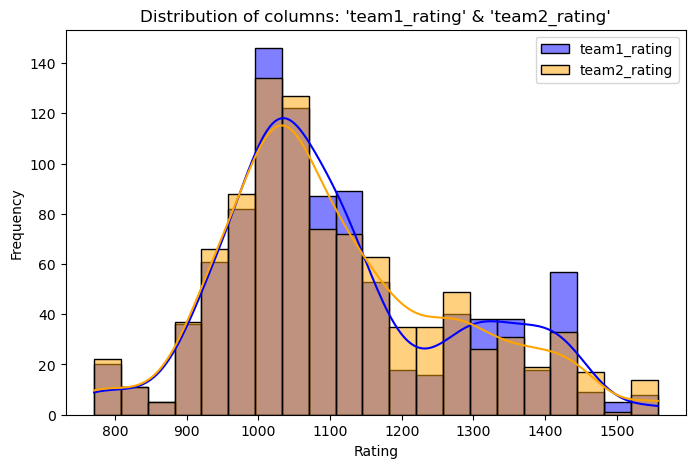

In [21]:
# create another function that uses seaborn to plot 2+ columns distribution
def plot_columns_distribution_histplot(df, columns, bins=21, colors=[], title="", xlabel=""):
    plt.figure(figsize=(8, 5))
    for column, color in zip(columns, colors):
        sns.histplot(data=df, x=column, bins=bins, kde=True, label=column, color=color, palette='hls')
    plt.title("Distribution of columns: " + title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

columns = ['team1_rating', 'team2_rating']
colors=['blue', 'orange']
title = "'team1_rating' & 'team2_rating'"
plot_columns_distribution_histplot(df, columns=columns, colors=colors, title=title, xlabel="Rating")

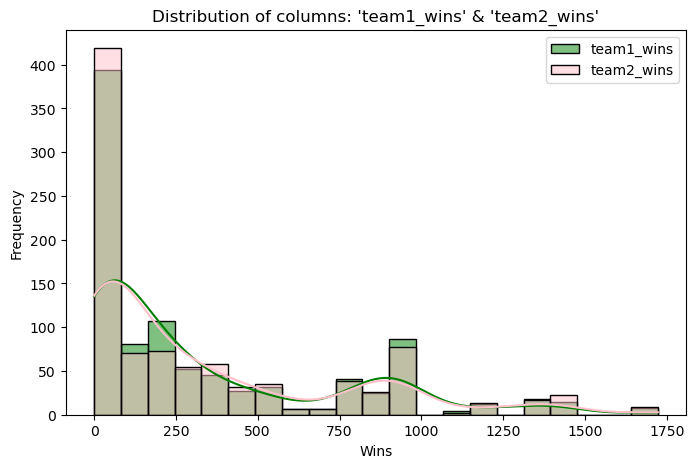

In [22]:
columns = ['team1_wins', 'team2_wins']
colors=['green', 'pink']
title = "'team1_wins' & 'team2_wins'"
plot_columns_distribution_histplot(df, columns=columns, colors=colors, title=title, xlabel="Wins")

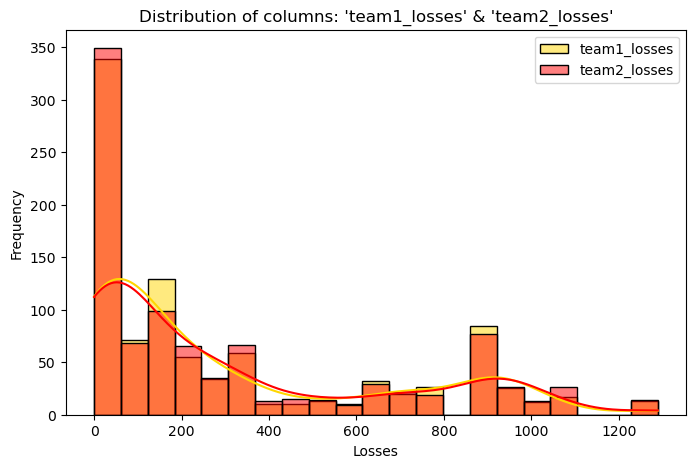

In [23]:
columns = ['team1_losses', 'team2_losses']
colors=['gold', 'red']
title = "'team1_losses' & 'team2_losses'"
plot_columns_distribution_histplot(df, columns=columns, colors=colors, title=title, xlabel="Losses")

Let's identify outliers by ploting boxplots.

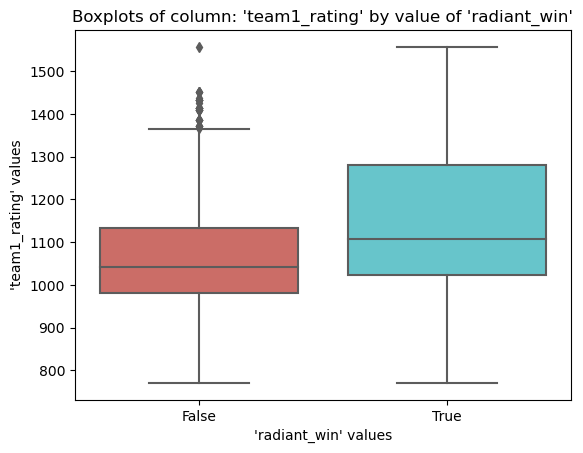

In [24]:
# function to plot boxplots per value of a column using seaborn
def plot_column_distribution_boxplot(df, colX, colY, palette='hls'):
    sns.boxplot(data=df, x=colX, y=colY, palette=palette)
    plt.xlabel("'"+colX+"' values")
    plt.ylabel("'"+colY+"' values")
    plt.title("Boxplots of column: '"+colY+"' by value of '"+colX+"'")
    plt.show()
    
plot_column_distribution_boxplot(df, 'radiant_win', 'team1_rating', palette='hls')

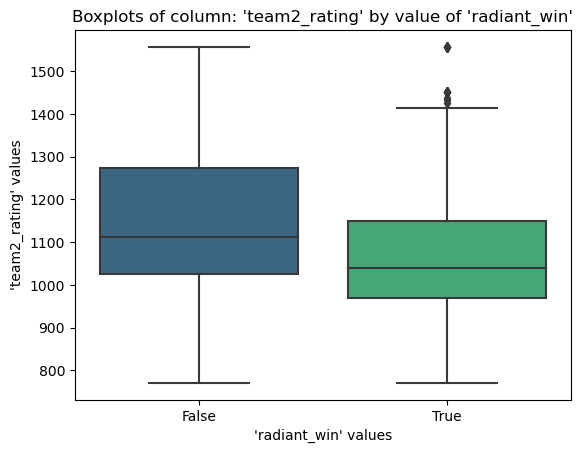

In [25]:
plot_column_distribution_boxplot(df, 'radiant_win', 'team2_rating', palette='viridis')

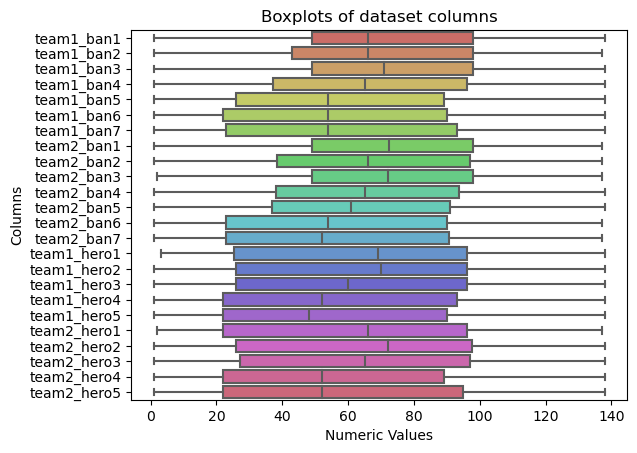

In [26]:
# function to plot boxplots from a set of columns using seaborn
def plot_columns_distribution_boxplot(df, palette='hls', xticks=0, orient="h"):
    sns.boxplot(data=df, palette=palette, orient=orient)
    if orient == "v":
        plt.xlabel("Columns")
        plt.xticks(rotation=xticks)
        plt.ylabel("Numeric Values")
    else:
        plt.xlabel("Numeric Values")
        plt.ylabel("Columns")
    plt.title("Boxplots of dataset columns")
    plt.show()

columns_chunk_0 = ['team1_ban1', 'team1_ban2', 'team1_ban3', 'team1_ban4', 'team1_ban5', 'team1_ban6', 'team1_ban7',
                   'team2_ban1', 'team2_ban2', 'team2_ban3', 'team2_ban4', 'team2_ban5', 'team2_ban6', 'team2_ban7']
columns_chunk_1 = ['team1_hero1', 'team1_hero2', 'team1_hero3', 'team1_hero4', 'team1_hero5',
                   'team2_hero1', 'team2_hero2', 'team2_hero3', 'team2_hero4', 'team2_hero5']
plot_columns_distribution_boxplot(df[columns_chunk_0 + columns_chunk_1], palette='hls')

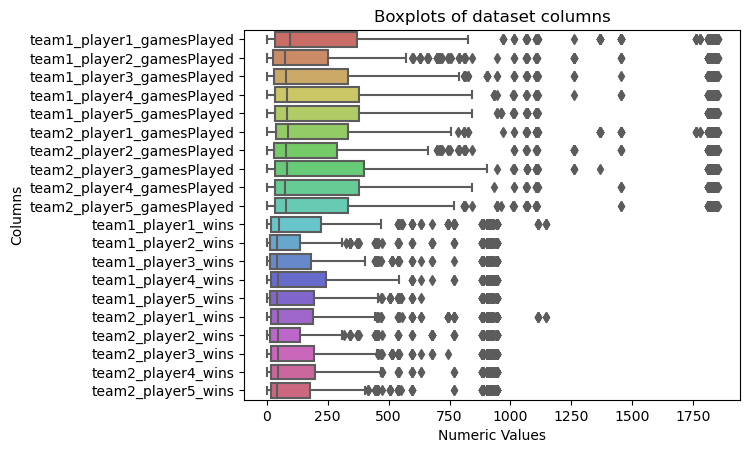

In [27]:
columns_chunk_2 = ['team1_player1_gamesPlayed', 'team1_player2_gamesPlayed', 'team1_player3_gamesPlayed', 'team1_player4_gamesPlayed', 'team1_player5_gamesPlayed',
                   'team2_player1_gamesPlayed', 'team2_player2_gamesPlayed', 'team2_player3_gamesPlayed', 'team2_player4_gamesPlayed', 'team2_player5_gamesPlayed']
columns_chunk_3 = ['team1_player1_wins', 'team1_player2_wins', 'team1_player3_wins', 'team1_player4_wins', 'team1_player5_wins',
                   'team2_player1_wins', 'team2_player2_wins', 'team2_player3_wins', 'team2_player4_wins', 'team2_player5_wins']
plot_columns_distribution_boxplot(df[columns_chunk_2 + columns_chunk_3], palette='hls')

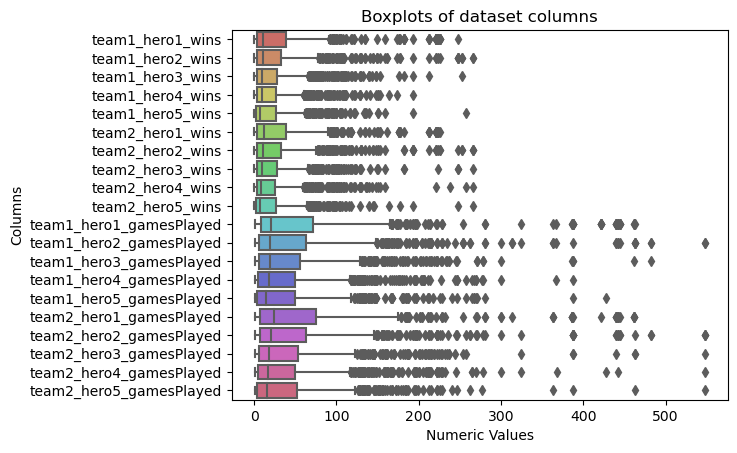

In [28]:
columns_chunk_4 = ['team1_hero1_wins', 'team1_hero2_wins', 'team1_hero3_wins', 'team1_hero4_wins', 'team1_hero5_wins',
                   'team2_hero1_wins', 'team2_hero2_wins', 'team2_hero3_wins', 'team2_hero4_wins', 'team2_hero5_wins']
columns_chunk_5 = ['team1_hero1_gamesPlayed', 'team1_hero2_gamesPlayed', 'team1_hero3_gamesPlayed', 'team1_hero4_gamesPlayed', 'team1_hero5_gamesPlayed',
                   'team2_hero1_gamesPlayed', 'team2_hero2_gamesPlayed', 'team2_hero3_gamesPlayed', 'team2_hero4_gamesPlayed', 'team2_hero5_gamesPlayed']
plot_columns_distribution_boxplot(df[columns_chunk_4 + columns_chunk_5], palette='hls')

In [29]:
def get_target_top_correlated_features(df, target, top_n=10, map_target=True):
    df_corr = df.copy()
    if map_target:
        df_corr[target] = df_corr[target].map({True:1, False:0})
    df_corr = df_corr.select_dtypes(include=['number'])
    correlation_matrix = df_corr.corr()
    correlation_target = correlation_matrix[[target]].sort_values(by=target, ascending=False)
    return correlation_target[:top_n] if top_n > 0 else correlation_target[top_n:]

get_target_top_correlated_features(df, 'radiant_win', top_n=10)

radiant_win
radiant_win                 1.000000
team1_rating                0.199115
team1_hero2_wins            0.137141
team1_hero3_wins            0.117195
team1_hero1_wins            0.114829
team1_hero2_gamesPlayed     0.112647
team1_wins                  0.107799
team1_hero5_wins            0.103524
team1_hero4_wins            0.092676
team1_hero1_gamesPlayed     0.092112

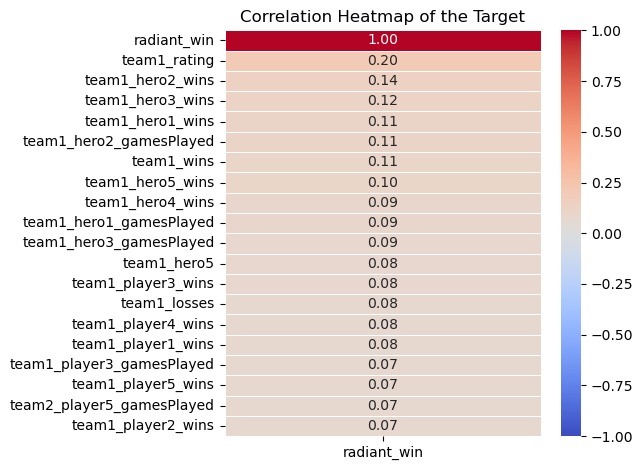

In [30]:
def plot_heatmap(matrix, xticks=0):
    sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
    plt.title('Correlation Heatmap of the Target')
    plt.xticks(rotation=xticks)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

correlation_matrix = get_target_top_correlated_features(df, 'radiant_win', top_n=20)
plot_heatmap(correlation_matrix)

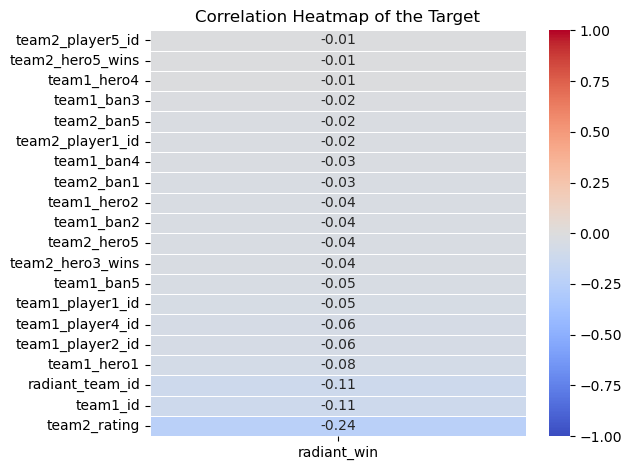

In [31]:
correlation_matrix = get_target_top_correlated_features(df, 'radiant_win', top_n=-20)
plot_heatmap(correlation_matrix)

### 2. Data Pre-processing & Normalization
- __missing values__
- __duplicates__
- __detect outliers & treatment__

__Dealing with missing values__

Let's perform a omission technique for 2 reasons:
- They represent a small percentage (< 10%) of the entire dataset.
- It won't be appropriate to impute missing ID values (from teams, heroes, or players) with a centraly tendency measurement because they are unique identifiers.

In [32]:
check_overall_missing_values(df)
display_shape_and_colnames(df, colnames=False)

Average of Missing Values per column: 30.54
Median of Missing Values per column: 41
% Average of Missing Values: 3.05 %
% Median of Missing Values: 4.10 %
Total Missing Values on dataset: 90
Total Missing Values on dataset: 9.00 %
# Rows: 1000
# Columns: 95


In [33]:
# drop missing values
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

In [34]:
check_overall_missing_values(df)
display_shape_and_colnames(df, colnames=False)

Average of Missing Values per column: 0.00
Median of Missing Values per column: 0
% Average of Missing Values: 0.00 %
% Median of Missing Values: 0.00 %
Total Missing Values on dataset: 0
Total Missing Values on dataset: 0.00 %
# Rows: 910
# Columns: 95


__Dealing with duplicates__

We don't have duplcated rows for now. We will check later after the pre-processing as well.

In [35]:
check_duplicated_values(df)

# Dupleicated Values: 0
% Duplicated Values: 0.0 %


__Detect Outliers and treatment__

Let's detect outliers with the 1.5*IQR rule

In [36]:
# function to get column outliers outside the 1.5*IQR range
def get_column_outliers(df, column, iqr_factor=1.5, return_indexes=True, return_lh=False,  print_=False):
    # implement the 1.5*IQR rule to detect outliers from the dataset column
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    lower = q1 - iqr_factor * IQR
    upper = q3 + iqr_factor * IQR
    if return_lh: return lower, upper
    
    # print lowest and highest value from the 1.5*IQR
    if print_:
        print(f"Column '{column}' outliers:")
        print("Lowest value above outliers:\t", lower)
        print("Highest value below outliers:\t", upper)
    
    # save outliers outside that range and return them as dataframe (or indexes)
    outliers = [index for index, value in df[column].items() if value < lower or value > upper]
    if return_indexes: return outliers
    return df.loc[outliers]

get_column_outliers(df, 'team1_rating', return_indexes=False, print_=True)[['team1_rating']]

Column 'team1_rating' outliers:
Lowest value above outliers:	 709.495
Highest value below outliers:	 1503.375


team1_rating
91        1556.99
106       1556.99
300       1556.99
305       1556.99
425       1556.99
539       1556.99
596       1556.99
704       1556.99

In [37]:
def get_columns_with_outliers(df):
    numeric_columns = get_numerical_columns(df)
    outlier_columns = []
    text = ""
    for column in numeric_columns:
        outliers = get_column_outliers(df, column)
        if(len(outliers) == 0): continue
        percentage = round(len(outliers)*100 / df.shape[0], 2)
        text += f"'{column}'" + '-'*(30-len(column)) + f"> {len(outliers):3} outliers ({percentage:.2f} %)\n"
        outlier_columns.append(column)
    print("# Columns with outliers:", len(outlier_columns))
    print(text)
    return outlier_columns
    
columns_with_outliers = get_columns_with_outliers(df)

# Columns with outliers: 50
'radiant_team_id'--------------->  99 outliers (10.88 %)
'dire_team_id'------------------> 110 outliers (12.09 %)
'series_type'------------------->  58 outliers (6.37 %)
'region'------------------------>  31 outliers (3.41 %)
'team1_id'---------------------->  99 outliers (10.88 %)
'team1_rating'------------------>   8 outliers (0.88 %)
'team1_wins'-------------------->  39 outliers (4.29 %)
'team2_id'----------------------> 110 outliers (12.09 %)
'team2_rating'------------------>  14 outliers (1.54 %)
'team2_wins'-------------------->  48 outliers (5.27 %)
'team1_player1_gamesPlayed'-----> 147 outliers (16.15 %)
'team1_player1_wins'------------> 147 outliers (16.15 %)
'team1_player2_gamesPlayed'-----> 168 outliers (18.46 %)
'team1_player2_wins'------------> 170 outliers (18.68 %)
'team1_player3_gamesPlayed'-----> 146 outliers (16.04 %)
'team1_player3_wins'------------> 140 outliers (15.38 %)
'team1_player4_gamesPlayed'-----> 122 outliers (13.41 %)
'team1_pl

We can not do anything about the ID outliers as they are unique identifiers.

'series_type' and 'region' are categorical columns, so let's remove them from our outlier columns.

'team1_last_match_time' and 'team2_last_match_time' are date columns, let's remove them as well.

In [38]:
columns_with_id = [col for col in columns_with_outliers if 'id' in col]
columns_with_outliers = [col for col in columns_with_outliers if col not in columns_with_id]
columns_with_outliers = [col for col in columns_with_outliers if col not in ['series_type', 'region', 'team1_last_match_time', 'team2_last_match_time']]
print("# Columns with outliers:", len(columns_with_outliers))
columns_with_outliers

# Columns with outliers: 44


['team1_rating',
 'team1_wins',
 'team2_rating',
 'team2_wins',
 'team1_player1_gamesPlayed',
 'team1_player1_wins',
 'team1_player2_gamesPlayed',
 'team1_player2_wins',
 'team1_player3_gamesPlayed',
 'team1_player3_wins',
 'team1_player4_gamesPlayed',
 'team1_player4_wins',
 'team1_player5_gamesPlayed',
 'team1_player5_wins',
 'team2_player1_gamesPlayed',
 'team2_player1_wins',
 'team2_player2_gamesPlayed',
 'team2_player2_wins',
 'team2_player3_gamesPlayed',
 'team2_player3_wins',
 'team2_player4_gamesPlayed',
 'team2_player4_wins',
 'team2_player5_gamesPlayed',
 'team2_player5_wins',
 'team1_hero1_gamesPlayed',
 'team1_hero1_wins',
 'team1_hero2_gamesPlayed',
 'team1_hero2_wins',
 'team1_hero3_gamesPlayed',
 'team1_hero3_wins',
 'team1_hero4_gamesPlayed',
 'team1_hero4_wins',
 'team1_hero5_gamesPlayed',
 'team1_hero5_wins',
 'team2_hero1_gamesPlayed',
 'team2_hero1_wins',
 'team2_hero2_gamesPlayed',
 'team2_hero2_wins',
 'team2_hero3_gamesPlayed',
 'team2_hero3_wins',
 'team2_hero4_

__We will NOT apply trimming to our outliers because we already lost a chunk of rows during the missing values omission.__

Let's try the 2 remaining techniques:
- Flooring & Capping
- Log Transformation

In [39]:
df_copy = df.copy()

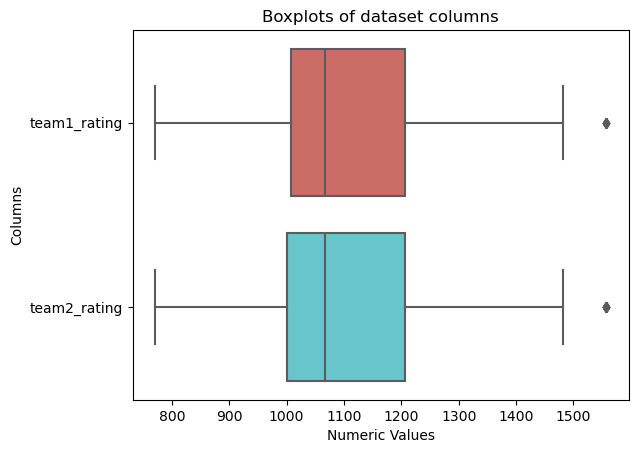

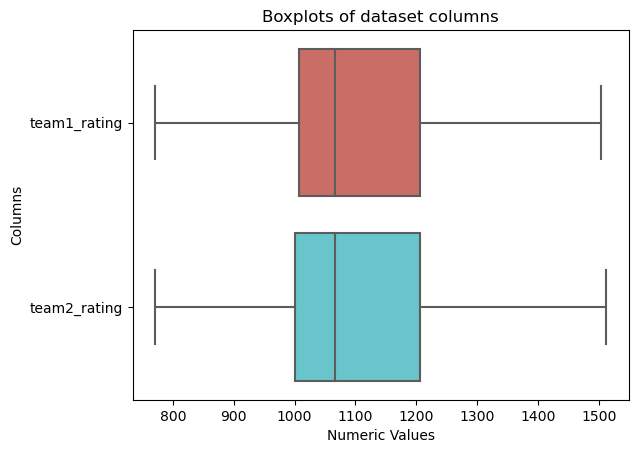

In [40]:
# apply flooring and capping technique on dataset
def apply_flooring_capping(df_original):
    # apply on a copy of the dataset
    df = df_original.copy()
    # loop through all columns
    for column in df.columns.to_list():
        # calculate floor and ceiling and get indexes of the outliers
        lowest, highest = get_column_outliers(df, column, return_lh=True)
        outlier_indexes = get_column_outliers(df, column, return_indexes=True)
        
        # floor and cap the outliers (looping through indexes)
        for index in outlier_indexes:
            current_value = df.iloc[index, df.columns.get_loc(column)]
            df.iloc[index, df.columns.get_loc(column)] = lowest if current_value < lowest else highest
    return df

columns_chunk1 = ['team1_rating', 'team2_rating']
plot_columns_distribution_boxplot(df[columns_chunk1], palette='hls')
df[columns_chunk1] = apply_flooring_capping(df[columns_chunk1])
plot_columns_distribution_boxplot(df[columns_chunk1], palette='hls')

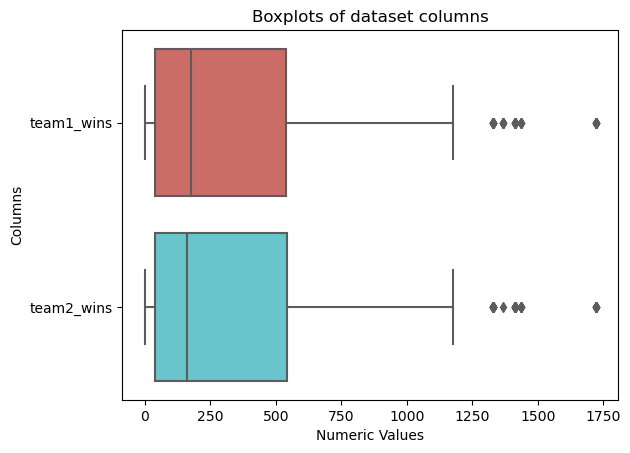

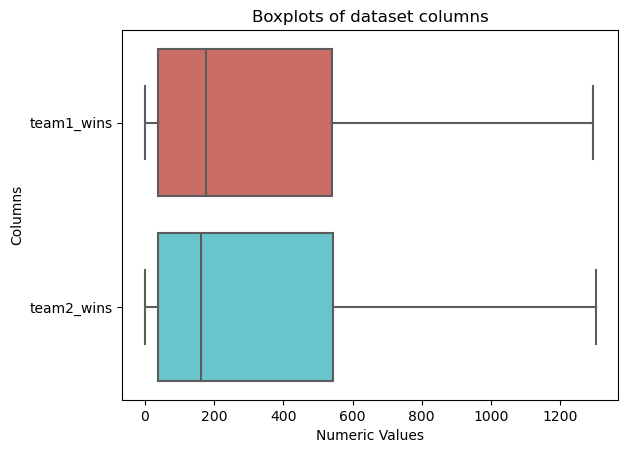

In [41]:
columns_chunk2 = ['team1_wins', 'team2_wins']
plot_columns_distribution_boxplot(df[columns_chunk2], palette='hls')
df[columns_chunk2] = apply_flooring_capping(df[columns_chunk2])
plot_columns_distribution_boxplot(df[columns_chunk2], palette='hls')

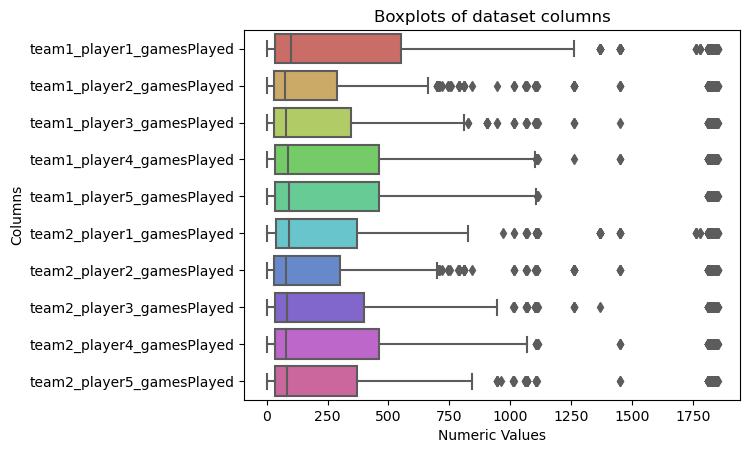

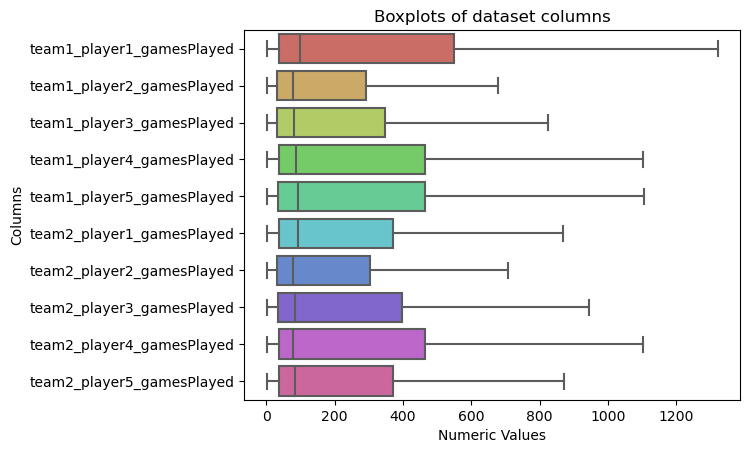

In [42]:
columns_chunk3 = ['team1_player1_gamesPlayed',
 'team1_player2_gamesPlayed',
 'team1_player3_gamesPlayed',
 'team1_player4_gamesPlayed',
 'team1_player5_gamesPlayed',
 'team2_player1_gamesPlayed',
 'team2_player2_gamesPlayed',
 'team2_player3_gamesPlayed',
 'team2_player4_gamesPlayed',
 'team2_player5_gamesPlayed']
plot_columns_distribution_boxplot(df[columns_chunk3], palette='hls')
df[columns_chunk3] = apply_flooring_capping(df[columns_chunk3])
plot_columns_distribution_boxplot(df[columns_chunk3], palette='hls')

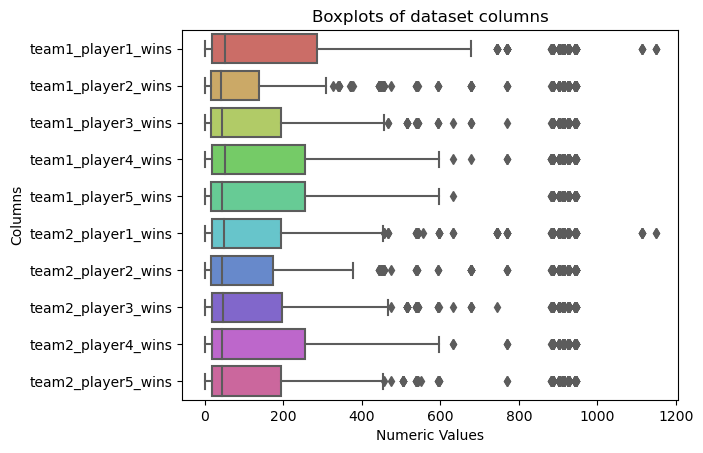

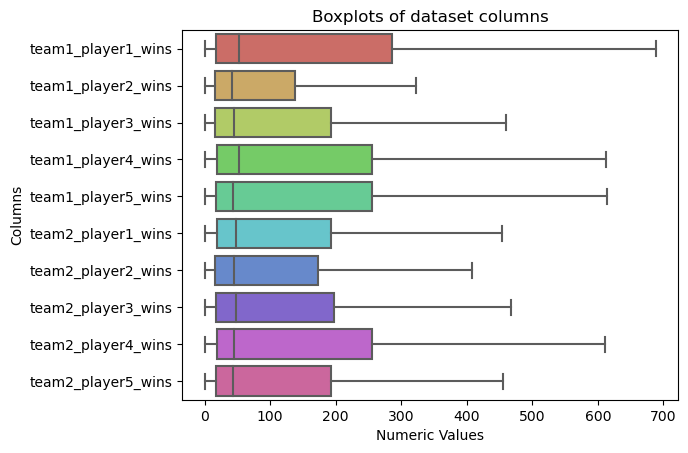

In [43]:
columns_chunk4 = ['team1_player1_wins',
 'team1_player2_wins',
 'team1_player3_wins',
 'team1_player4_wins',
 'team1_player5_wins',
 'team2_player1_wins',
 'team2_player2_wins',
 'team2_player3_wins',
 'team2_player4_wins',
 'team2_player5_wins']
plot_columns_distribution_boxplot(df[columns_chunk4], palette='hls')
df[columns_chunk4] = apply_flooring_capping(df[columns_chunk4])
plot_columns_distribution_boxplot(df[columns_chunk4], palette='hls')

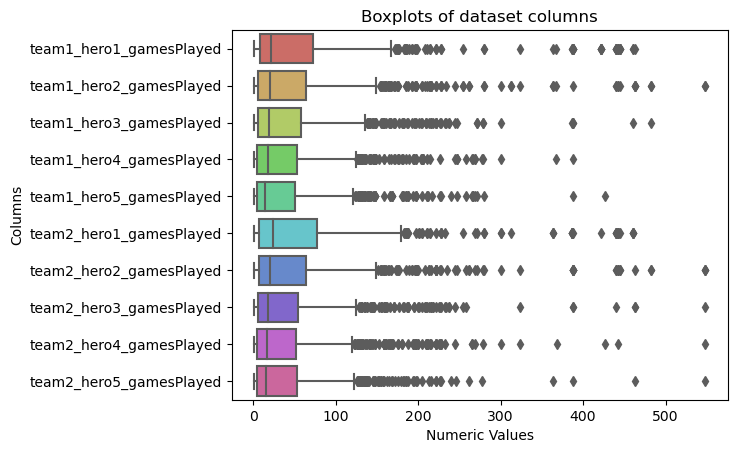

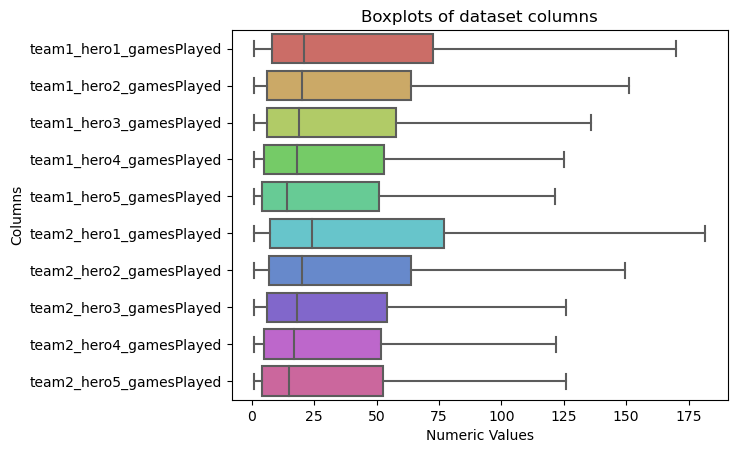

In [44]:
columns_chunk5 = ['team1_hero1_gamesPlayed',
 'team1_hero2_gamesPlayed',
 'team1_hero3_gamesPlayed',
 'team1_hero4_gamesPlayed',
 'team1_hero5_gamesPlayed',
 'team2_hero1_gamesPlayed',
 'team2_hero2_gamesPlayed',
 'team2_hero3_gamesPlayed',
 'team2_hero4_gamesPlayed',
 'team2_hero5_gamesPlayed']
plot_columns_distribution_boxplot(df[columns_chunk5], palette='hls')
df[columns_chunk5] = apply_flooring_capping(df[columns_chunk5])
plot_columns_distribution_boxplot(df[columns_chunk5], palette='hls')

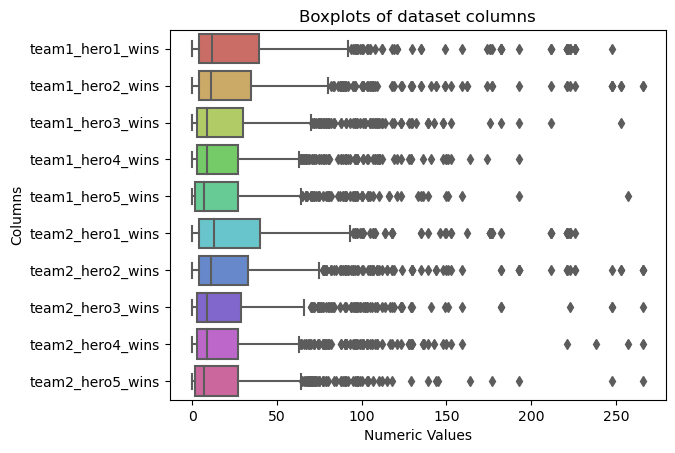

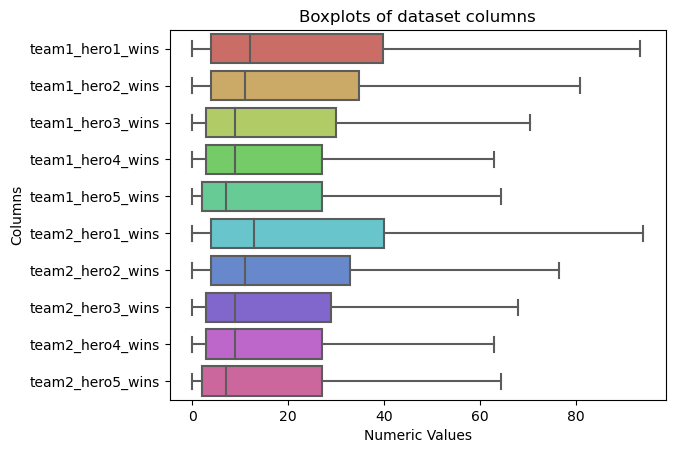

In [45]:
columns_chunk6 = ['team1_hero1_wins',
 'team1_hero2_wins',
 'team1_hero3_wins',
 'team1_hero4_wins',
 'team1_hero5_wins',
 'team2_hero1_wins',
 'team2_hero2_wins',
 'team2_hero3_wins',
 'team2_hero4_wins',
 'team2_hero5_wins']
plot_columns_distribution_boxplot(df[columns_chunk6], palette='hls')
df[columns_chunk6] = apply_flooring_capping(df[columns_chunk6])
plot_columns_distribution_boxplot(df[columns_chunk6], palette='hls')

We have seen the results with __flooring & capping__ technique, now let's try using a __log transformation__ and compare results.

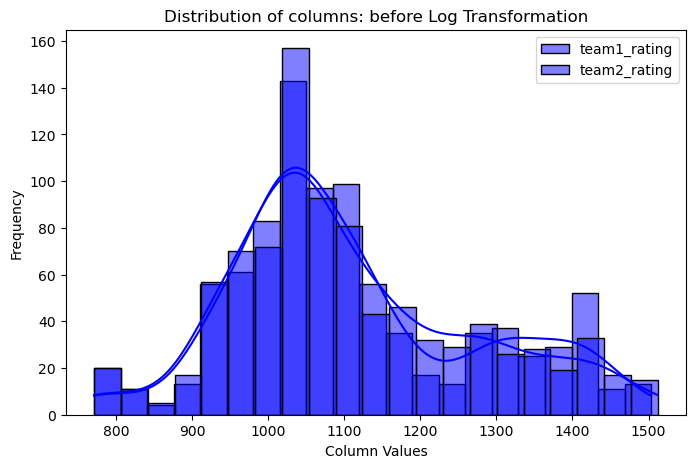

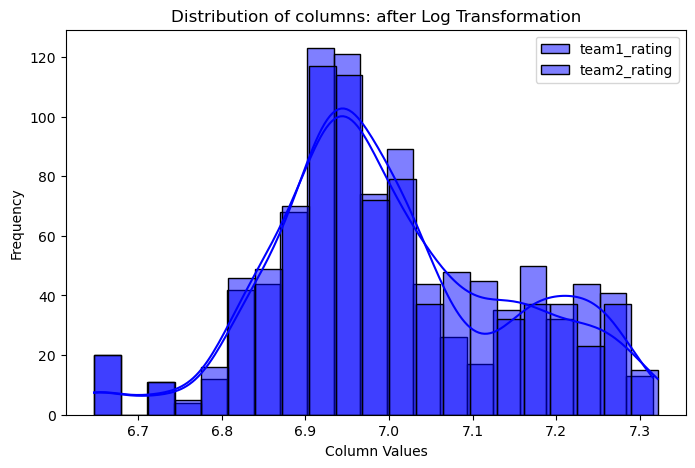

In [46]:
# apply log transformation technique on dataset
def apply_log_transformation(df_original):
    # apply on a copy of the dataset
    df = df_original.copy()
    # apply log to columns
    for column in df.columns.to_list():
        df[column] = df[column].map(lambda value : np.log(value) if value > 0 else 0)
    return df

colors = ['blue' for _ in range(len(columns_chunk1))]
plot_columns_distribution_histplot(df, columns=columns_chunk1, colors=colors, xlabel="Column Values", title='before Log Transformation')
df[columns_chunk1] = apply_log_transformation(df[columns_chunk1])
plot_columns_distribution_histplot(df, columns=columns_chunk1, colors=colors, xlabel="Column Values", title='after Log Transformation')

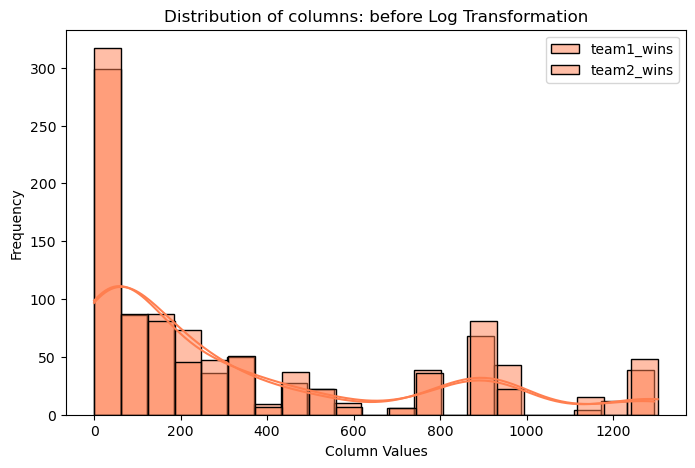

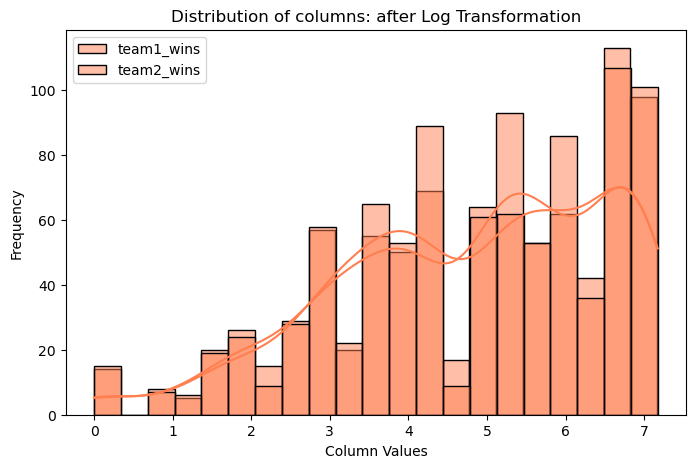

In [47]:
colors = ['coral' for _ in range(len(columns_chunk2))]
plot_columns_distribution_histplot(df, columns=columns_chunk2, colors=colors, xlabel="Column Values", title='before Log Transformation')
df[columns_chunk2] = apply_log_transformation(df[columns_chunk2])
plot_columns_distribution_histplot(df, columns=columns_chunk2, colors=colors, xlabel="Column Values", title='after Log Transformation')

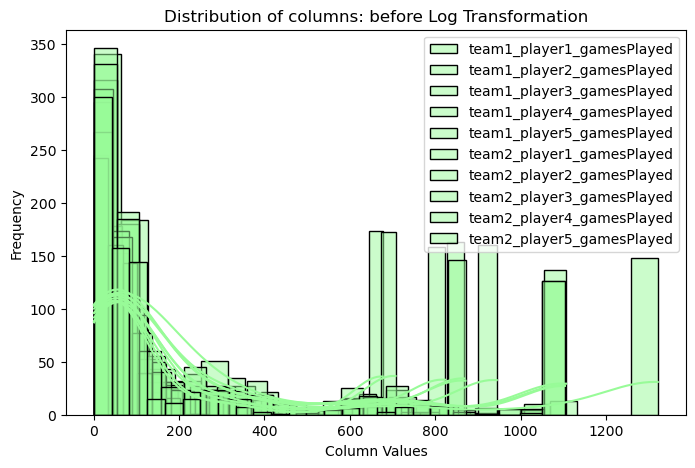

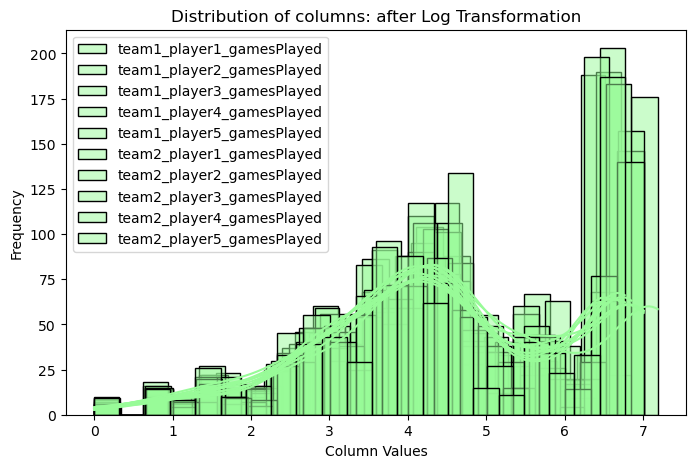

In [48]:
colors = ['palegreen' for _ in range(len(columns_chunk3))]
plot_columns_distribution_histplot(df, columns=columns_chunk3, colors=colors, xlabel="Column Values", title='before Log Transformation')
df[columns_chunk3] = apply_log_transformation(df[columns_chunk3])
plot_columns_distribution_histplot(df, columns=columns_chunk3, colors=colors, xlabel="Column Values", title='after Log Transformation')

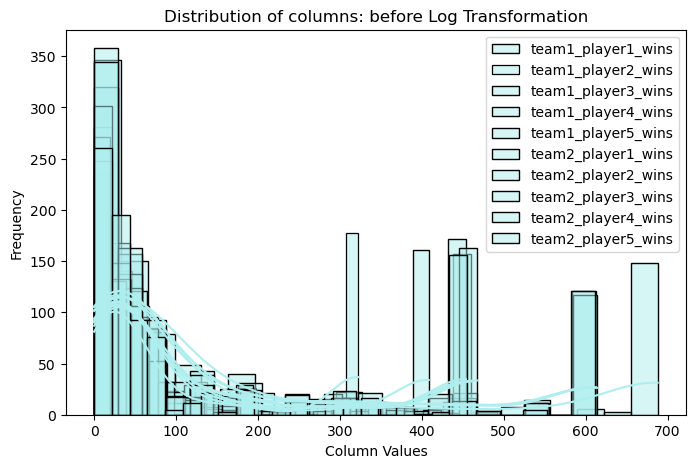

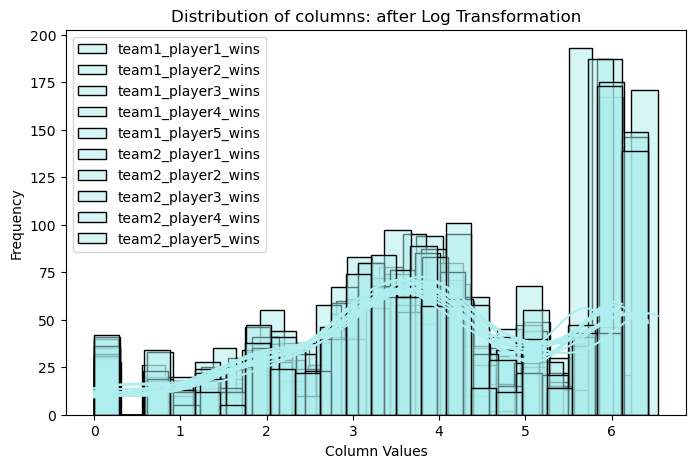

In [49]:
colors = ['paleturquoise' for _ in range(len(columns_chunk4))]
plot_columns_distribution_histplot(df, columns=columns_chunk4, colors=colors, xlabel="Column Values", title='before Log Transformation')
df[columns_chunk4] = apply_log_transformation(df[columns_chunk4])
plot_columns_distribution_histplot(df, columns=columns_chunk4, colors=colors, xlabel="Column Values", title='after Log Transformation')

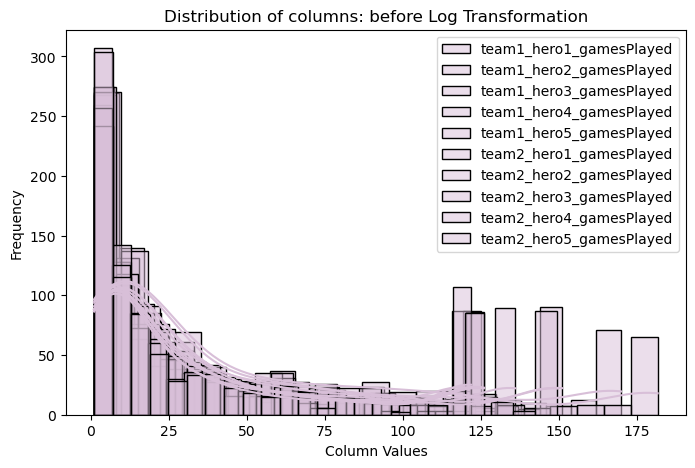

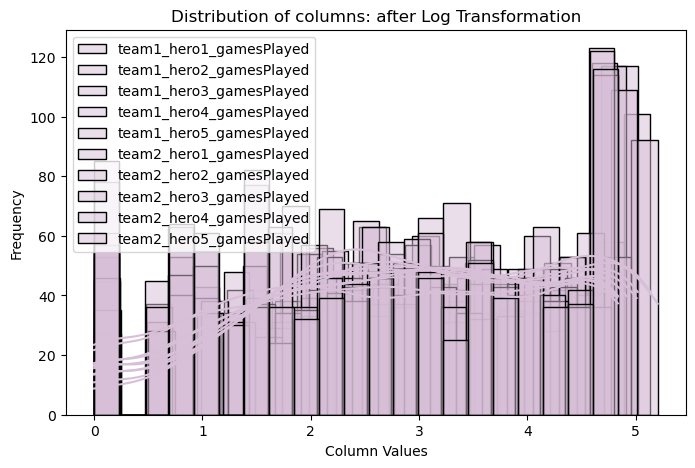

In [50]:
colors = ['thistle' for _ in range(len(columns_chunk5))]
plot_columns_distribution_histplot(df, columns=columns_chunk5, colors=colors, xlabel="Column Values", title='before Log Transformation')
df[columns_chunk5] = apply_log_transformation(df[columns_chunk5])
plot_columns_distribution_histplot(df, columns=columns_chunk5, colors=colors, xlabel="Column Values", title='after Log Transformation')

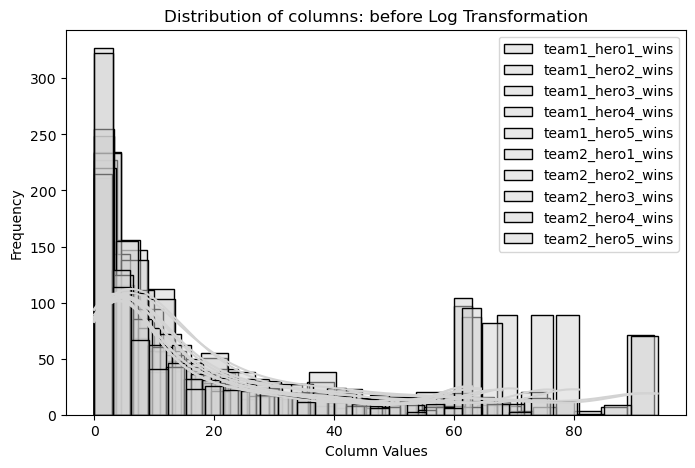

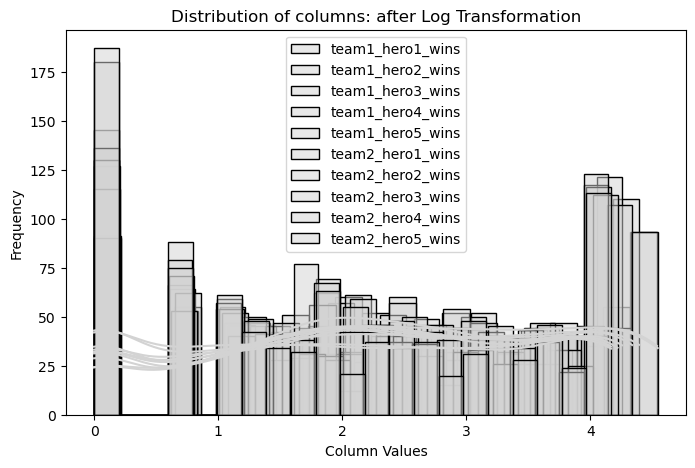

In [51]:
colors = ['lightgray' for _ in range(len(columns_chunk6))]
plot_columns_distribution_histplot(df, columns=columns_chunk6, colors=colors, xlabel="Column Values", title='before Log Transformation')
df[columns_chunk6] = apply_log_transformation(df[columns_chunk6])
plot_columns_distribution_histplot(df, columns=columns_chunk6, colors=colors, xlabel="Column Values", title='after Log Transformation')

In [52]:
get_columns_with_outliers(df[columns_with_outliers])

# Columns with outliers: 4
'team1_player2_gamesPlayed'----->   8 outliers (0.88 %)
'team2_player1_gamesPlayed'----->  10 outliers (1.10 %)
'team2_player2_gamesPlayed'----->   6 outliers (0.66 %)
'team2_player5_gamesPlayed'----->   9 outliers (0.99 %)



['team1_player2_gamesPlayed',
 'team2_player1_gamesPlayed',
 'team2_player2_gamesPlayed',
 'team2_player5_gamesPlayed']

Both techniques (__flooring & capping__ and __log transformation__ show impressive results.

One remarkable difference is that after log transformation we still have some outliers on 4 columns. However, these are very few (<= 10 outliers per column)

and represent aprox. 1% of the dataset rows.

On the other hand, flooring & capping presents 0 outliers on all columns.

### 3. Data Normalization (numerical features, standard scaling)
- one-hot encoding nominal variables
- datetime columns
- label encoding ordinal variables
- standard scaling

__One-hot encoding nominal variables__

To identify nominal variables let's check the non-numeric columns previously identified.

In [53]:
non_numeric_columns

['start_time',
 'radiant_name',
 'dire_name',
 'league_name',
 'radiant_win',
 'team1_last_match_time',
 'team2_last_match_time']

In [54]:
df[non_numeric_columns]

start_time        radiant_name         dire_name  \
0   2024-03-29 18:30:25            Dominion         KIBA ARMS   
1   2024-03-29 17:29:43        Rest Farmers            NextUp   
2   2024-03-29 17:21:45           L1GA TEAM       NAVI Junior   
3   2024-03-29 17:18:46           KIBA ARMS          Dominion   
4   2024-03-29 16:51:47          EYE Gaming           Uzumaki   
..                  ...                 ...               ...   
905 2024-03-20 09:41:53        BulletProofs  Parallel eSports   
906 2024-03-20 09:06:08         Mad Monkeys     Swift Knights   
907 2024-03-20 08:58:51               Talon        Execration   
908 2024-03-20 08:58:42  Blacklist Rivalry      MAG Indonesia   
909 2024-03-20 08:57:29           FenixTeam   Big Bang Gaming   

                                           league_name  radiant_win  \
0                      Ultras Dota Pro League  2023-24         True   
1                          RES - Regional Series EU #1         True   
2                     Portal Dota2 World Invitationals         True   
3                      Ultras Dota Pro League  2023-24         True   
4                      Ultras Dota Pro League  2023-24        False   
..                                                 ...          ...   
905                                    Ancients League         True   
906                                     Destiny League         True   
907  DreamLeague Season 23 Qualifiers Powered by Intel         True   
908  DreamLeague Season 23 Qualifiers Powered by Intel         True   
909                                    Ancients League        False   

    team1_last_match_time team2_last_match_time  
0     2024-03-29 19:19:08   2024-03-30 14:48:35  
1     2024-03-29 18:35:42   2024-03-29 18:35:42  
2     2024-03-30 14:30:29   2024-03-29 17:21:45  
3     2024-03-30 14:48:35   2024-03-29 19:19:08  
4     2024-03-30 15:05:05   2024-03-29 22:56:56  
..                    ...                   ...  
905   2024-03-28 04:49:06   2024-03-29 07:06:40  
906   2024-03-29 08:13:22   2024-03-29 05:51:28  
907   2024-03-28 03:18:42   2024-03-20 14:11:25  
908   2024-03-28 07:04:03   2024-03-25 05:03:40  
909   2024-03-28 06:08:08   2024-03-29 05:43:07  

[910 rows x 7 columns]

These 3 columns are actually date types:
- __start_time__
- __team1_last_match_time__
- __team2_last_match_time__

Then, these 3 columns are just names for the already numeric ID columns (so we will remove them later):
- __radiant_name__ ---> (team1_id)
- __dire_name__ ---> (team2_id)
- __league_name__ ---> (leagueid)

The remaining column (our target):
- __radiant_win__

has boolean values, so it can't be considered a nominal variable.

__Datetime columns__

Let's convert the datetime columns (originaly timestamp integers) into datetime.

In [55]:
def convert_datetime_columns(df, date_columns):
    for column in date_columns:
        df[column] = pd.to_datetime(df[column], unit='s')
        
date_columns = ['start_time', 'team1_last_match_time', 'team2_last_match_time']
convert_datetime_columns(df, date_columns)
df[date_columns]

start_time team1_last_match_time team2_last_match_time
0   2024-03-29 18:30:25   2024-03-29 19:19:08   2024-03-30 14:48:35
1   2024-03-29 17:29:43   2024-03-29 18:35:42   2024-03-29 18:35:42
2   2024-03-29 17:21:45   2024-03-30 14:30:29   2024-03-29 17:21:45
3   2024-03-29 17:18:46   2024-03-30 14:48:35   2024-03-29 19:19:08
4   2024-03-29 16:51:47   2024-03-30 15:05:05   2024-03-29 22:56:56
..                  ...                   ...                   ...
905 2024-03-20 09:41:53   2024-03-28 04:49:06   2024-03-29 07:06:40
906 2024-03-20 09:06:08   2024-03-29 08:13:22   2024-03-29 05:51:28
907 2024-03-20 08:58:51   2024-03-28 03:18:42   2024-03-20 14:11:25
908 2024-03-20 08:58:42   2024-03-28 07:04:03   2024-03-25 05:03:40
909 2024-03-20 08:57:29   2024-03-28 06:08:08   2024-03-29 05:43:07

[910 rows x 3 columns]

Now, let's extract useful columns from the date features.

For example, for 'start_time' we can extract:
- day
- month
- hour
- minute
- week
- weekday

For 'team1_last_match_time' and 'team2_last_match_time' we can extract:
- number of days passed since the team last played

In [56]:
df['start_time_month'] = df['start_time'].dt.month
df['start_time_day'] = df['start_time'].dt.day
df['start_time_hour'] = df['start_time'].dt.hour
df['start_time_minute'] = df['start_time'].dt.minute
df['start_time_week'] = df['start_time'].dt.weekofyear
df['start_time_weekday'] = df['start_time'].dt.weekday
df['team1_days_last_match'] = (pd.datetime.today() - df['team1_last_match_time']).dt.days
df['team2_days_last_match'] = (pd.datetime.today() - df['team2_last_match_time']).dt.days

In [57]:
new_columns = ['start_time_month',
               'start_time_day',
               'start_time_hour',
               'start_time_minute',
               'start_time_week',
               'start_time_weekday',
               'team1_days_last_match',
               'team2_days_last_match']
df[new_columns]

start_time_month  start_time_day  start_time_hour  start_time_minute  \
0                   3              29               18                 30   
1                   3              29               17                 29   
2                   3              29               17                 21   
3                   3              29               17                 18   
4                   3              29               16                 51   
..                ...             ...              ...                ...   
905                 3              20                9                 41   
906                 3              20                9                  6   
907                 3              20                8                 58   
908                 3              20                8                 58   
909                 3              20                8                 57   

     start_time_week  start_time_weekday  team1_days_last_match  \
0                 13                   4                      8   
1                 13                   4                      8   
2                 13                   4                      8   
3                 13                   4                      8   
4                 13                   4                      8   
..               ...                 ...                    ...   
905               12                   2                     10   
906               12                   2                      9   
907               12                   2                     10   
908               12                   2                     10   
909               12                   2                     10   

     team2_days_last_match  
0                        8  
1                        8  
2                        9  
3                        8  
4                        8  
..                     ...  
905                      9  
906                      9  
907                     18  
908                     13  
909                      9  

[910 rows x 8 columns]

__Label encoding ordinal variables__

As the only categorical variable that we have is our __target ('radiant_win')__ we can apply a lambda function to the column,

and map the following values:
- True  ---> 1
- False ---> 0

In [58]:
df.replace({False: 0, True: 1}, inplace=True)
df[['radiant_win']].tail()

radiant_win
905            1
906            1
907            1
908            1
909            0

__Standard scaling__

Now that we have only numerical columns, let's apply a Scaler to our dataset.

We will firstly go for a Standard Scaling.

In [59]:
from sklearn.preprocessing import StandardScaler

# function to scale an entire dataset, returns only numeric columns scaled
def standard_scale_dataset(df, target):
    # get numerical columns and exclude target
    numerical_columns = get_numerical_columns(df)
    if target in numerical_columns:
        numerical_columns.remove(target)
    
    # scale the dataset using a StandardScaler
    scaler = StandardScaler()
    df_numeric = df[numerical_columns]
    df_scaled = scaler.fit_transform(df_numeric.to_numpy())
    df_scaled = pd.DataFrame(df_scaled, columns=df_numeric.columns.to_list())
    df_scaled[target] = df[target]
    return df_scaled

df_scaled = standard_scale_dataset(df, 'radiant_win')
df_scaled

match_id  radiant_team_id  dire_team_id  leagueid  series_type    region  \
0    1.691570         0.512803      0.498396 -1.105358    -0.204366  0.226806   
1    1.669091         0.503348      0.474041  0.668333    -0.204366 -0.528109   
2    1.667107         0.474143      0.351677  1.406702    -0.204366 -0.528109   
3    1.665259         0.499872      0.510697 -1.105358    -0.204366  0.226806   
4    1.655367         0.377527      0.507108 -1.105358    -0.204366 -0.528109   
..        ...              ...           ...       ...          ...       ...   
905 -1.778343         0.486304      0.299101 -1.434413    -0.204366 -0.528109   
906 -1.785706         0.171673      0.186191 -0.471323    -0.204366 -0.528109   
907 -1.786979         0.157609      0.026041  0.856939    -0.204366 -0.226143   
908 -1.787004         0.189237      0.457174  0.856939    -0.204366 -0.226143   
909 -1.787239         0.309516      0.299102 -1.434413    -0.204366 -0.528109   

     team2_ban1  team1_ban1  team1_ban2  team2_ban2  ...  team2_hero5_wins  \
0     -0.198828    0.192429   -0.671635    0.681029  ...         -1.383103   
1      0.761190   -0.680114   -0.467352    1.793348  ...         -1.383103   
2     -1.488851    0.312779   -0.058784    0.300500  ...         -0.903754   
3      1.511203   -0.168623   -0.496535    0.300500  ...         -1.383103   
4     -1.548852    1.546374   -1.401221   -0.284931  ...         -0.903754   
..          ...         ...         ...         ...  ...               ...   
905    1.181197   -1.823445   -1.576321   -0.899633  ...          1.498371   
906    1.421201    1.215409   -1.372037    0.798116  ...          1.150447   
907    0.521185    1.125146    0.875086   -1.836322  ...          0.754519   
908   -0.708837    1.125146    0.408151    1.090831  ...         -1.383103   
909    1.181197   -1.522568   -0.817553   -0.899633  ...          1.167956   

     start_time_month  start_time_day  start_time_hour  start_time_minute  \
0                 0.0        1.582441         1.169680           0.209874   
1                 0.0        1.582441         0.998498           0.155786   
2                 0.0        1.582441         0.998498          -0.276919   
3                 0.0        1.582441         0.998498          -0.439183   
4                 0.0        1.582441         0.827316           1.345723   
..                ...             ...              ...                ...   
905               0.0       -1.738131        -0.370957           0.804842   
906               0.0       -1.738131        -0.370957          -1.088240   
907               0.0       -1.738131        -0.542138           1.724339   
908               0.0       -1.738131        -0.542138           1.724339   
909               0.0       -1.738131        -0.542138           1.670251   

     start_time_week  start_time_weekday  team1_days_last_match  \
0           0.881671            0.713677              -0.986357   
1           0.881671            0.713677              -0.986357   
2           0.881671            0.713677              -0.986357   
3           0.881671            0.713677              -0.986357   
4           0.881671            0.713677              -0.986357   
..               ...                 ...                    ...   
905        -1.134210           -0.449163               0.052514   
906        -1.134210           -0.449163              -0.466921   
907        -1.134210           -0.449163               0.052514   
908        -1.134210           -0.449163               0.052514   
909        -1.134210           -0.449163               0.052514   

     team2_days_last_match  radiant_win  
0                -0.946315            1  
1                -0.946315            1  
2                -0.429420            1  
3                -0.946315            1  
4                -0.946315            0  
..                     ...          ...  
905              -0.429420            1  
906              -0.429420   

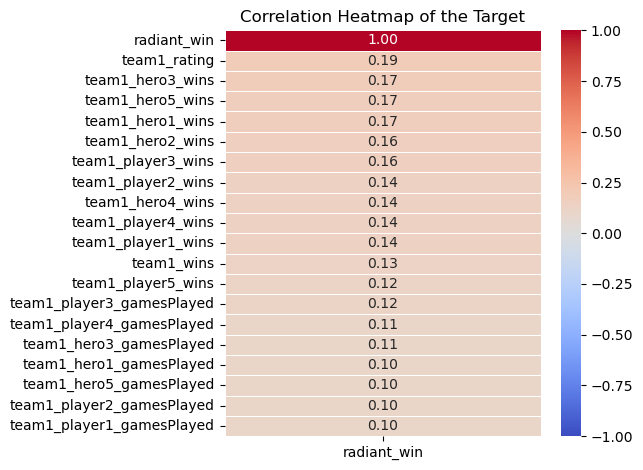

In [60]:
correlation_matrix = get_target_top_correlated_features(df_scaled, 'radiant_win', top_n=20, map_target=False)
plot_heatmap(correlation_matrix)

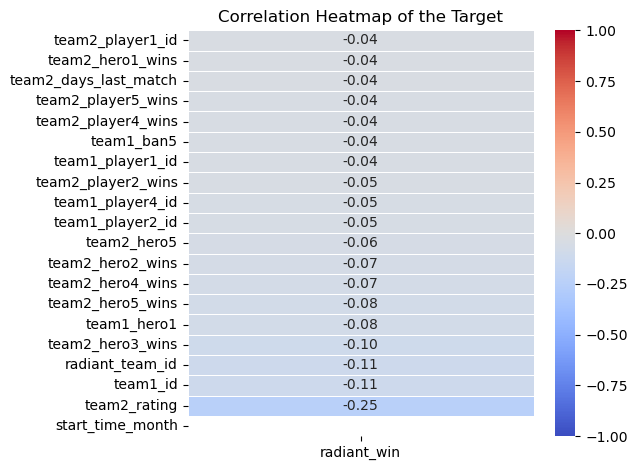

In [61]:
correlation_matrix = get_target_top_correlated_features(df_scaled, 'radiant_win', top_n=-20, map_target=False)
plot_heatmap(correlation_matrix)

In [62]:
df_scaled

match_id  radiant_team_id  dire_team_id  leagueid  series_type    region  \
0    1.691570         0.512803      0.498396 -1.105358    -0.204366  0.226806   
1    1.669091         0.503348      0.474041  0.668333    -0.204366 -0.528109   
2    1.667107         0.474143      0.351677  1.406702    -0.204366 -0.528109   
3    1.665259         0.499872      0.510697 -1.105358    -0.204366  0.226806   
4    1.655367         0.377527      0.507108 -1.105358    -0.204366 -0.528109   
..        ...              ...           ...       ...          ...       ...   
905 -1.778343         0.486304      0.299101 -1.434413    -0.204366 -0.528109   
906 -1.785706         0.171673      0.186191 -0.471323    -0.204366 -0.528109   
907 -1.786979         0.157609      0.026041  0.856939    -0.204366 -0.226143   
908 -1.787004         0.189237      0.457174  0.856939    -0.204366 -0.226143   
909 -1.787239         0.309516      0.299102 -1.434413    -0.204366 -0.528109   

     team2_ban1  team1_ban1  team1_ban2  team2_ban2  ...  team2_hero5_wins  \
0     -0.198828    0.192429   -0.671635    0.681029  ...         -1.383103   
1      0.761190   -0.680114   -0.467352    1.793348  ...         -1.383103   
2     -1.488851    0.312779   -0.058784    0.300500  ...         -0.903754   
3      1.511203   -0.168623   -0.496535    0.300500  ...         -1.383103   
4     -1.548852    1.546374   -1.401221   -0.284931  ...         -0.903754   
..          ...         ...         ...         ...  ...               ...   
905    1.181197   -1.823445   -1.576321   -0.899633  ...          1.498371   
906    1.421201    1.215409   -1.372037    0.798116  ...          1.150447   
907    0.521185    1.125146    0.875086   -1.836322  ...          0.754519   
908   -0.708837    1.125146    0.408151    1.090831  ...         -1.383103   
909    1.181197   -1.522568   -0.817553   -0.899633  ...          1.167956   

     start_time_month  start_time_day  start_time_hour  start_time_minute  \
0                 0.0        1.582441         1.169680           0.209874   
1                 0.0        1.582441         0.998498           0.155786   
2                 0.0        1.582441         0.998498          -0.276919   
3                 0.0        1.582441         0.998498          -0.439183   
4                 0.0        1.582441         0.827316           1.345723   
..                ...             ...              ...                ...   
905               0.0       -1.738131        -0.370957           0.804842   
906               0.0       -1.738131        -0.370957          -1.088240   
907               0.0       -1.738131        -0.542138           1.724339   
908               0.0       -1.738131        -0.542138           1.724339   
909               0.0       -1.738131        -0.542138           1.670251   

     start_time_week  start_time_weekday  team1_days_last_match  \
0           0.881671            0.713677              -0.986357   
1           0.881671            0.713677              -0.986357   
2           0.881671            0.713677              -0.986357   
3           0.881671            0.713677              -0.986357   
4           0.881671            0.713677              -0.986357   
..               ...                 ...                    ...   
905        -1.134210           -0.449163               0.052514   
906        -1.134210           -0.449163              -0.466921   
907        -1.134210           -0.449163               0.052514   
908        -1.134210           -0.449163               0.052514   
909        -1.134210           -0.449163               0.052514   

     team2_days_last_match  radiant_win  
0                -0.946315            1  
1                -0.946315            1  
2                -0.429420            1  
3                -0.946315            1  
4                -0.946315            0  
..                     ...          ...  
905              -0.429420            1  
906              -0.429420   

### 4. Dimensionality Reduction techniques (feature selection, feature extraction)
- __feature selection (remove uncorrelated columns)__
- __PCA__
- __Kernel PCA__
- __LDA__

__Feature selection (remove uncorrelated columns)__

First of all, we have already discarded the following columns during the dataset scaling.

These are the reasons why we discarded them:
- __'start_time'__ ---> because the column is in date format and we already extracted 6 new features during the 'Datetime columns' section.
- __'team1_last_match_time'__ ---> because the column is in date format and we already extracted a new feature from it
- __'team2_last_match_time'__ ---> because the column is in date format and we already extracted a new feature from it
- __'radiant_name'__ ---> because the column is just a label for this other feature 'team1_id'
- __'dire_name'__ ---> because the column is just a label for this other feature 'team2_id'
- __'league_name'__ ---> because the column is just a label for this other feature 'leagueid'

Now let's discard more columns, performing a feature selection.

Let's find the most uncorrelated columns to our target.

In [63]:
display_shape_and_colnames(df_scaled, colnames=False)

# Rows: 910
# Columns: 97


In [64]:
def get_target_uncorrelated_features(df, target, thresh=0.1):
    df_corr = df.copy()
    correlation_matrix = df_corr.corr()
    correlation_target = correlation_matrix[[target]].sort_values(by=target, ascending=False)
    correlation_filter_1 = correlation_target[target] >= -thresh
    correlation_filter_2 = correlation_target[target] <= thresh
    return correlation_target[correlation_filter_1 & correlation_filter_2]

correlation_matrix = get_target_uncorrelated_features(df_scaled, 'radiant_win')
correlation_matrix

radiant_win
team1_hero2_gamesPlayed       0.094209
team1_hero4_gamesPlayed       0.082048
team1_player5_gamesPlayed     0.079521
team1_losses                  0.077233
team1_hero5                   0.075412
...                                ...
team2_hero5                  -0.058748
team2_hero2_wins             -0.065986
team2_hero4_wins             -0.071125
team2_hero5_wins             -0.078836
team1_hero1                  -0.080641

[72 rows x 1 columns]

In [65]:
display_shape_and_colnames(correlation_matrix.T, colnames=True)

# Rows: 1
# Columns: 72
Column names: Index(['team1_hero2_gamesPlayed', 'team1_hero4_gamesPlayed',
       'team1_player5_gamesPlayed', 'team1_losses', 'team1_hero5',
       'team2_player4_id', 'team2_player2_id', 'team2_losses', 'team2_ban3',
       'team2_hero1', 'start_time_minute', 'team2_id', 'dire_team_id',
       'match_id', 'start_time_day', 'team2_ban2', 'team2_hero1_gamesPlayed',
       'team1_player3_id', 'start_time_week', 'team2_hero2',
       'team2_player1_gamesPlayed', 'start_time_hour', 'start_time_weekday',
       'team1_ban6', 'team2_ban6', 'team1_hero3', 'team2_player3_gamesPlayed',
       'team1_player5_id', 'team1_ban7', 'team2_player3_id',
       'team2_player5_gamesPlayed', 'team2_hero3', 'team2_ban7', 'team1_ban1',
       'team2_hero2_gamesPlayed', 'team2_player4_gamesPlayed', 'team2_ban4',
       'region', 'team2_player2_gamesPlayed', 'leagueid', 'team2_hero4',
       'series_type', 'team2_hero4_gamesPlayed', 'team2_hero5_gamesPlayed',
       'team1_hero4', 'te

From the 97 columns, 72 have <= 10% of correlation to our target.

Let's get rid of these uncorrelated columns for now.

In [66]:
uncorrelated_columns = correlation_matrix.index.to_list()
df_scaled = df_scaled.drop(uncorrelated_columns, axis=1)
display_shape_and_colnames(df_scaled, colnames=True)

# Rows: 910
# Columns: 25
Column names: Index(['radiant_team_id', 'team1_id', 'team1_rating', 'team1_wins',
       'team2_rating', 'team1_player1_gamesPlayed', 'team1_player1_wins',
       'team1_player2_gamesPlayed', 'team1_player2_wins',
       'team1_player3_gamesPlayed', 'team1_player3_wins',
       'team1_player4_gamesPlayed', 'team1_player4_wins', 'team1_player5_wins',
       'team1_hero1_gamesPlayed', 'team1_hero1_wins', 'team1_hero2_wins',
       'team1_hero3_gamesPlayed', 'team1_hero3_wins', 'team1_hero4_wins',
       'team1_hero5_gamesPlayed', 'team1_hero5_wins', 'team2_hero3_wins',
       'start_time_month', 'radiant_win'],
      dtype='object')


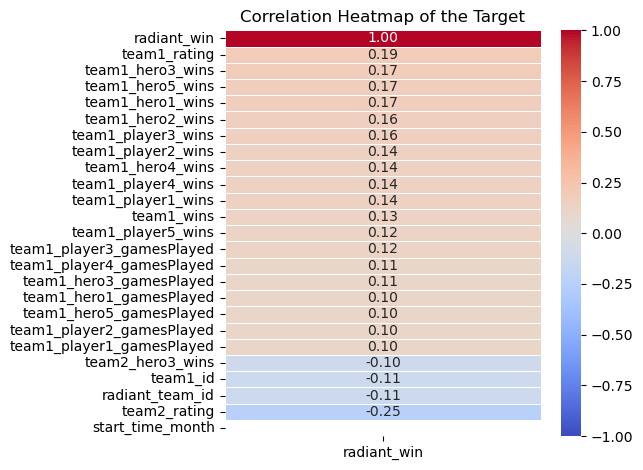

In [67]:
correlation_matrix = get_target_top_correlated_features(df_scaled, 'radiant_win', top_n=25, map_target=False)
plot_heatmap(correlation_matrix)

__PCA__

As we still see low correlation between our remaining features and our target.

Let's try a PCA technique for dimensionality reduction.

In [68]:
from sklearn.decomposition import PCA

# function to extract PCA features from a dataset
def get_pca_features(df, target, n_components, print_=True):
    # get features applying PCA technique
    pca = PCA(n_components = n_components, whiten = True)
    features = df_scaled.drop(target, axis=1).to_numpy()
    features_pca = pca.fit_transform(features)
    
    # print nubmer of features before and after
    if print_:
        print('Original number of features:', features.shape[1])
        print('Reduced number of features:', features_pca.shape[1])
        print('LDA Explained Variance Ratio:', pca.explained_variance_ratio_)
        
    return features_pca

# function to convert numpy features and target into an actual pandas dataframe
def get_dataframe(features, target_name, target):
    df = pd.DataFrame(features)
    df[target_name] = target
    return df

target = 'radiant_win'
pca_features = get_pca_features(df, target, n_components=0.99)
pca_df = get_dataframe(pca_features, target, df[target])
pca_df

Original number of features: 24
Reduced number of features: 14
LDA Explained Variance Ratio: [0.61273122 0.10836238 0.06035022 0.04030805 0.03162546 0.0253373
 0.01879232 0.01794237 0.01721906 0.01477471 0.01436058 0.01191201
 0.00944487 0.00865461]


0         1         2         3         4         5         6  \
0    2.109395  0.268786  0.773943  0.484695 -0.056233 -0.233474  0.042488   
1    1.161167 -0.169317  1.036208 -0.539734 -0.624485  2.173905 -1.634149   
2    0.768297  0.047824 -0.336757 -0.995887 -0.130025  0.083734  0.450106   
3    1.043816 -0.129170  0.849000 -1.019884 -0.222916  0.141670  0.047629   
4    0.279680 -0.245714  1.806999  1.030331  1.585068 -2.023236  2.728937   
..        ...       ...       ...       ...       ...       ...       ...   
905  0.426848 -0.434803 -0.971206  0.165953 -0.361339 -0.075553  0.014007   
906 -1.455925 -1.164780  0.132245  0.935939 -0.377961 -0.176597  0.010180   
907 -0.431274  0.297274 -0.355601  0.396702  1.157908  0.258378  0.991878   
908 -0.010626  0.306720 -0.604054 -0.203881  0.742070 -0.380094  1.446610   
909 -1.101164 -1.306272 -0.061260  0.298748 -0.800096 -0.287907 -0.144950   

            7         8         9        10        11        12        13  \
0   -0.464222 -0.677415 -0.881025 -0.465512 -0.420658 -0.322039  0.110891   
1    0.622420 -0.614999 -0.849786  0.630002  0.140739  0.837652  0.129597   
2   -2.280288  0.249455 -0.124788  1.321965 -0.449044  0.681826 -0.512067   
3    0.579017  0.278644  0.490933 -0.247301 -2.400416 -0.881043 -1.803595   
4   -3.175432  3.706919  1.030234 -0.336649  2.936890  2.099719 -0.701271   
..        ...       ...       ...       ...       ...       ...       ...   
905  0.794107  0.397071 -1.456804 -1.094416  0.720869 -0.720521  0.156095   
906 -0.054953 -0.486915 -0.266269 -0.015601  0.249671 -0.330654 -0.424495   
907 -1.057029 -1.100568 -1.288143  0.072614 -0.679552  0.918810 -0.436790   
908 -1.713197 -2.068618  0.690378 -0.401339 -1.261847  0.995555 -1.922419   
909  0.853738  0.856602 -0.410152 -0.943623 -0.891309  1.264759  1.675753   

     radiant_win  
0              1  
1              1  
2              1  
3              1  
4              0  
..           ...  
905            1  
906            1  
907            1  
908            1  
909            0  

[910 rows x 15 columns]

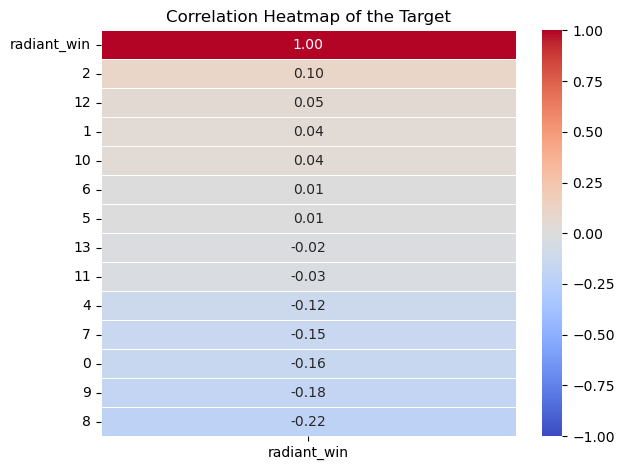

In [69]:
correlation_matrix = get_target_top_correlated_features(pca_df, 'radiant_win', top_n=14, map_target=False)
plot_heatmap(correlation_matrix)

In [70]:
pca_features = get_pca_features(df, target, n_components=5)
pca_df = get_dataframe(pca_features, target, df[target])
pca_df

Original number of features: 24
Reduced number of features: 5
LDA Explained Variance Ratio: [0.61273122 0.10836238 0.06035022 0.04030805 0.03162546]


0         1         2         3         4  radiant_win
0    2.109395  0.268786  0.773943  0.484697 -0.056237            1
1    1.161167 -0.169317  1.036208 -0.539734 -0.624484            1
2    0.768297  0.047824 -0.336757 -0.995887 -0.130024            1
3    1.043816 -0.129170  0.849000 -1.019883 -0.222919            1
4    0.279680 -0.245714  1.806999  1.030331  1.585068            0
..        ...       ...       ...       ...       ...          ...
905  0.426848 -0.434803 -0.971206  0.165954 -0.361340            1
906 -1.455925 -1.164780  0.132245  0.935938 -0.377961            1
907 -0.431274  0.297274 -0.355601  0.396702  1.157909            1
908 -0.010626  0.306720 -0.604054 -0.203882  0.742072            1
909 -1.101164 -1.306272 -0.061260  0.298748 -0.800096            0

[910 rows x 6 columns]

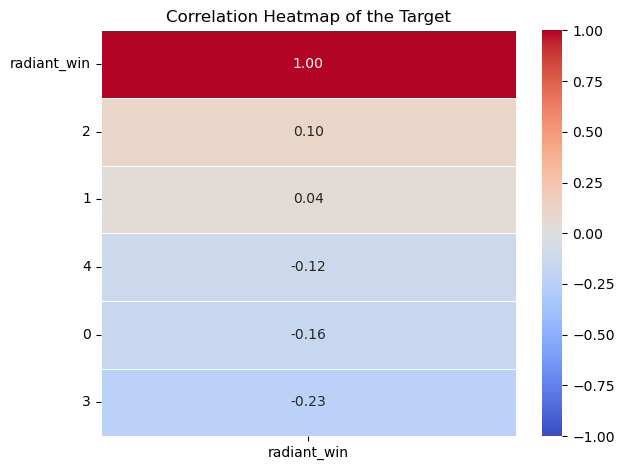

In [71]:
correlation_matrix = get_target_top_correlated_features(pca_df, 'radiant_win', top_n=14, map_target=False)
plot_heatmap(correlation_matrix)

__Kernel PCA__



In [72]:
from sklearn.decomposition import KernelPCA

# function to extract Kernel PCA features from a dataset
def get_kpca_features(df, target, n_components, gamma=15, print_=True):
    # get features applying KPCA technique
    kpca = KernelPCA(kernel="rbf", gamma=gamma, n_components=n_components)
    features = df_scaled.drop(target, axis=1).to_numpy()
    features_kpca = kpca.fit_transform(features)
    
    # print nubmer of features before and after
    if print_:
        print('Original number of features:', features.shape[1])
        print('Reduced number of features:', features_kpca.shape[1])
        
    return features_kpca

kpca_features = get_kpca_features(df, target, n_components=14)
kpca_df = get_dataframe(kpca_features, target, df[target])
kpca_df

Original number of features: 24
Reduced number of features: 14


0         1         2         3         4         5         6  \
0   -0.003087 -0.002611 -0.001702 -0.002579 -0.002708 -0.001653 -0.003060   
1   -0.003087 -0.002611 -0.001702 -0.002579 -0.002708 -0.001653 -0.003060   
2   -0.003087 -0.002611 -0.001702 -0.002579 -0.002708 -0.001653 -0.003060   
3   -0.003087 -0.002611 -0.001702 -0.002579 -0.002708 -0.001653 -0.003060   
4   -0.003087 -0.002611 -0.001702 -0.002579 -0.002708 -0.001653 -0.003060   
..        ...       ...       ...       ...       ...       ...       ...   
905 -0.003087 -0.002611 -0.001702 -0.002579 -0.002708 -0.001653 -0.003060   
906 -0.003127 -0.002659 -0.001763 -0.002673 -0.002768 -0.001915 -0.000199   
907 -0.003087 -0.002611 -0.001702 -0.002579 -0.002708 -0.001653 -0.003060   
908 -0.003087 -0.002611 -0.001702 -0.002579 -0.002708 -0.001653 -0.003060   
909 -0.003087 -0.002611 -0.001702 -0.002579 -0.002708 -0.001653 -0.003060   

            7         8         9        10        11        12        13  \
0   -0.003014 -0.000815  0.001050 -0.002502 -0.002003 -0.001432 -0.001445   
1   -0.003014 -0.000815  0.001050 -0.002502 -0.002003 -0.001432 -0.001445   
2   -0.003014 -0.000815  0.001050 -0.002502 -0.002003 -0.001432 -0.001445   
3   -0.003014 -0.000815  0.001050 -0.002502 -0.002003 -0.001432 -0.001445   
4   -0.003014 -0.000815  0.001050 -0.002502 -0.002003 -0.001432 -0.001445   
..        ...       ...       ...       ...       ...       ...       ...   
905 -0.003014 -0.000815  0.001050 -0.002502 -0.002003 -0.001432 -0.001445   
906 -0.001235  0.000871 -0.016358  0.017214 -0.000525  0.001175  0.063822   
907 -0.003014 -0.000815  0.001050 -0.002502 -0.002003 -0.001432 -0.001445   
908 -0.003014 -0.000815  0.001050 -0.002502 -0.002003 -0.001432 -0.001445   
909 -0.003014 -0.000815  0.001050 -0.002502 -0.002003 -0.001432 -0.001445   

     radiant_win  
0              1  
1              1  
2              1  
3              1  
4              0  
..           ...  
905            1  
906            1  
907            1  
908            1  
909            0  

[910 rows x 15 columns]

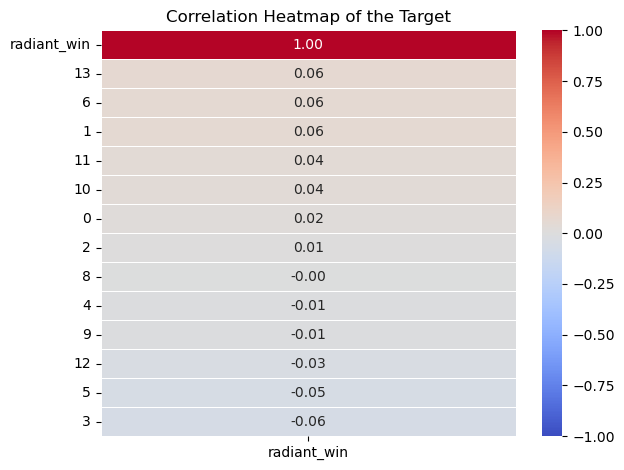

In [73]:
correlation_matrix = get_target_top_correlated_features(kpca_df, 'radiant_win', top_n=14, map_target=False)
plot_heatmap(correlation_matrix)

In [74]:
kpca_features = get_kpca_features(df, target, n_components=5)
kpca_df = get_dataframe(kpca_features, target, df[target])
kpca_df

Original number of features: 24
Reduced number of features: 5


0         1         2         3         4  radiant_win
0   -0.003087 -0.002611 -0.001702 -0.002579 -0.002708            1
1   -0.003087 -0.002611 -0.001702 -0.002579 -0.002708            1
2   -0.003087 -0.002611 -0.001702 -0.002579 -0.002708            1
3   -0.003087 -0.002611 -0.001702 -0.002579 -0.002708            1
4   -0.003087 -0.002611 -0.001702 -0.002579 -0.002708            0
..        ...       ...       ...       ...       ...          ...
905 -0.003087 -0.002611 -0.001702 -0.002579 -0.002708            1
906 -0.003127 -0.002659 -0.001763 -0.002673 -0.002768            1
907 -0.003087 -0.002611 -0.001702 -0.002579 -0.002708            1
908 -0.003087 -0.002611 -0.001702 -0.002579 -0.002708            1
909 -0.003087 -0.002611 -0.001702 -0.002579 -0.002708            0

[910 rows x 6 columns]

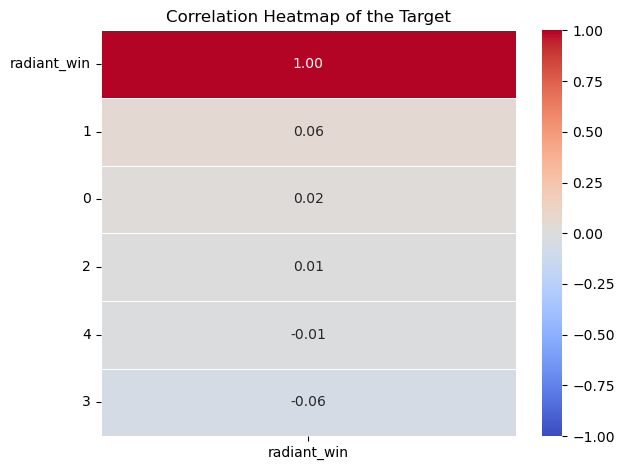

In [75]:
correlation_matrix = get_target_top_correlated_features(kpca_df, 'radiant_win', top_n=14, map_target=False)
plot_heatmap(correlation_matrix)

In [76]:
df['radiant_win']

0      1
1      1
2      1
3      1
4      0
      ..
905    1
906    1
907    1
908    1
909    0
Name: radiant_win, Length: 910, dtype: int64

__LDA: Linear Discriminant Analysis__


In [77]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# function to extract lda features from a dataset
def get_lda_features(df, target, n_components, print_=True):
    # get features applying KPCA technique
    lda = LinearDiscriminantAnalysis(n_components=n_components)
    features = df_scaled.drop(target, axis=1).to_numpy()
    features_lda = lda.fit(features, df[target].to_numpy()).transform(features)
    
    # print nubmer of features before and after
    if print_:
        print('Original number of features:', features.shape[1])
        print('Reduced number of features:', features_lda.shape[1])
        print('LDA Explained Variance Ratio:', lda.explained_variance_ratio_)
        
    return features_lda

lda_features = get_lda_features(df, target, n_components=1)
lda_df = get_dataframe(lda_features, target, df[target])
lda_df

Original number of features: 24
Reduced number of features: 1
LDA Explained Variance Ratio: [1.]


0  radiant_win
0   -0.851050            1
1   -0.979613            1
2   -1.100189            1
3   -0.267917            1
4    2.420431            0
..        ...          ...
905  0.361027            1
906 -0.384574            1
907 -1.145336            1
908 -1.040432            1
909  0.236584            0

[910 rows x 2 columns]

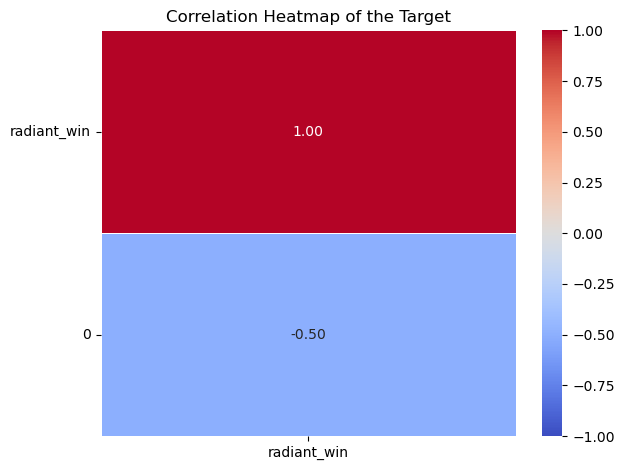

In [78]:
correlation_matrix = get_target_top_correlated_features(lda_df, 'radiant_win', top_n=5, map_target=False)
plot_heatmap(correlation_matrix)

### 5. Using machine learning classification models
- __Split data test & train__
- __Train models & display metric__
- __Hyperparameter tuning__
- __compare models (visualization)__
- __interaction & polynomial features__
- __regularization (ridge, lasso)__

__Split data into test & train subsets__

In [155]:
from sklearn.model_selection import train_test_split

# function to split a dataset into test and train subsets
def split_dataset(df, target, test_size=0.3, print_=True):
    # set x features and y target
    x = df.drop([target], axis=1)
    y = df[target]
    
    # split the dataset into x & y - test & train subsets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    if print_:
        print('x_train shape:', x_train.shape)
        print('x_test shape:', x_test.shape)
        print('y_train shape:', y_train.shape)
        print('y_test shape:', y_test.shape) 
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = split_dataset(df_scaled, 'radiant_win')

x_train shape: (728, 24)
x_test shape: (182, 24)
y_train shape: (728,)
y_test shape: (182,)


__Train models & display metrics__

For this project __we don't have to use an over sampler (data augmentation) because our classes are balanced__.

In [183]:
from sklearn.metrics import accuracy_score, f1_score

# function to train a model
def train_model(model, x_train, y_train):
    model_fitted = model.fit(x_train, y_train)
    display(model_fitted)
    y_pred_train = model_fitted.predict(x_train)
    y_pred_test = model_fitted.predict(x_test)
    return y_pred_train, y_pred_test

# function to display the classification model metrics
def display_classifier_metrics(y_train, y_pred_train, y_test, y_pred_test):
    print('- Acuracy Score Train:', accuracy_score(y_train, y_pred_train).round(4))
    print('- Acuracy Score Test:', accuracy_score(y_test, y_pred_test).round(4))
    print('- F1 Score Train:', f1_score(y_train, y_pred_train).round(4))
    print('- F1 Score Test:', f1_score(y_test, y_pred_test).round(4))
    print()


In [171]:
from sklearn.linear_model import LogisticRegression

# testing our 'train_model' and 'display_classifier_metrics' functions
y_pred_train, y_pred_test = train_model(LogisticRegression(), x_train, y_train)
display_classifier_metrics(y_train, y_pred_train, y_test, y_pred_test)

LogisticRegression()

Acuracy Score Train: 0.7129
Acuracy Score Test: 0.6923
F1 Score Train: 0.7117
F1 Score Test: 0.7113


In [215]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# function to train & test a group of models, displaying each metrics for comparison
def train_and_measure_models(models, x_train, x_test, y_train, y_test, display_metrics=True):
    # loop through the models, train & test and display metrics, save the predictions
    y_predictions = {}
    for model in models:
        name = type(model).__name__ # extract the model name
        y_pred_train, y_pred_test = train_model(model, x_train, y_train) # train & test the model
        y_predictions[name] = (y_pred_train, y_pred_test) # save the predictions into a dictionary
        if display_metrics: # print model's name, accuracy and f1-score
            print("Model:", name)
            display_classifier_metrics(y_train, y_pred_train, y_test, y_pred_test)
    return y_predictions

# set the models that we will be testing on this project
models = (LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier(), SVC())

Train & Test our models using our numeric __Scaled Dataset__

In [216]:
display_shape_and_colnames(df_scaled)

# Rows: 910
# Columns: 25
Column names: Index(['radiant_team_id', 'team1_id', 'team1_rating', 'team1_wins',
       'team2_rating', 'team1_player1_gamesPlayed', 'team1_player1_wins',
       'team1_player2_gamesPlayed', 'team1_player2_wins',
       'team1_player3_gamesPlayed', 'team1_player3_wins',
       'team1_player4_gamesPlayed', 'team1_player4_wins', 'team1_player5_wins',
       'team1_hero1_gamesPlayed', 'team1_hero1_wins', 'team1_hero2_wins',
       'team1_hero3_gamesPlayed', 'team1_hero3_wins', 'team1_hero4_wins',
       'team1_hero5_gamesPlayed', 'team1_hero5_wins', 'team2_hero3_wins',
       'start_time_month', 'radiant_win'],
      dtype='object')


In [217]:
# test models using our scaled dataset
x_train, x_test, y_train, y_test = split_dataset(df_scaled, 'radiant_win')
y_predictions_scaled = train_and_measure_models(models, x_train, x_test, y_train, y_test)

x_train shape: (728, 24)
x_test shape: (182, 24)
y_train shape: (728,)
y_test shape: (182,)


LogisticRegression()

Model: LogisticRegression
- Acuracy Score Train: 0.7143
- Acuracy Score Test: 0.7473
- F1 Score Train: 0.7151
- F1 Score Test: 0.7723



RandomForestClassifier()

Model: RandomForestClassifier
- Acuracy Score Train: 1.0
- Acuracy Score Test: 0.6813
- F1 Score Train: 1.0
- F1 Score Test: 0.7041



GradientBoostingClassifier()

Model: GradientBoostingClassifier
- Acuracy Score Train: 0.9135
- Acuracy Score Test: 0.7143
- F1 Score Train: 0.9114
- F1 Score Test: 0.74



SVC()

Model: SVC
- Acuracy Score Train: 0.7747
- Acuracy Score Test: 0.7418
- F1 Score Train: 0.7753
- F1 Score Test: 0.7773



Train & Test our models using our __PCA Dataset__

In [218]:
display_shape_and_colnames(pca_df)

# Rows: 910
# Columns: 6
Column names: Index([0, 1, 2, 3, 4, 'radiant_win'], dtype='object')


In [219]:
# test models using our pca dataset
x_train, x_test, y_train, y_test = split_dataset(pca_df, 'radiant_win')
y_predictions_pca = train_and_measure_models(models, x_train, x_test, y_train, y_test)

x_train shape: (728, 5)
x_test shape: (182, 5)
y_train shape: (728,)
y_test shape: (182,)


LogisticRegression()

Model: LogisticRegression
- Acuracy Score Train: 0.6016
- Acuracy Score Test: 0.6978
- F1 Score Train: 0.5904
- F1 Score Test: 0.6821



RandomForestClassifier()

Model: RandomForestClassifier
- Acuracy Score Train: 1.0
- Acuracy Score Test: 0.5989
- F1 Score Train: 1.0
- F1 Score Test: 0.5731



GradientBoostingClassifier()

Model: GradientBoostingClassifier
- Acuracy Score Train: 0.8764
- Acuracy Score Test: 0.6099
- F1 Score Train: 0.8729
- F1 Score Test: 0.6162



SVC()

Model: SVC
- Acuracy Score Train: 0.6813
- Acuracy Score Test: 0.6374
- F1 Score Train: 0.6647
- F1 Score Test: 0.6207



Train & Test our models using our __Kernel PCA Dataset__

In [220]:
display_shape_and_colnames(kpca_df)

# Rows: 910
# Columns: 6
Column names: Index([0, 1, 2, 3, 4, 'radiant_win'], dtype='object')


In [221]:
# test models using our Kernel PCA dataset
x_train, x_test, y_train, y_test = split_dataset(kpca_df, 'radiant_win')
y_predictions_kpca = train_and_measure_models(models, x_train, x_test, y_train, y_test)

x_train shape: (728, 5)
x_test shape: (182, 5)
y_train shape: (728,)
y_test shape: (182,)


LogisticRegression()

Model: LogisticRegression
- Acuracy Score Train: 0.5137
- Acuracy Score Test: 0.478
- F1 Score Train: 0.674
- F1 Score Test: 0.6442



RandomForestClassifier()

Model: RandomForestClassifier
- Acuracy Score Train: 0.5769
- Acuracy Score Test: 0.5
- F1 Score Train: 0.2936
- F1 Score Test: 0.1165



GradientBoostingClassifier()

Model: GradientBoostingClassifier
- Acuracy Score Train: 0.5728
- Acuracy Score Test: 0.5055
- F1 Score Train: 0.2784
- F1 Score Test: 0.1176



SVC()

Model: SVC
- Acuracy Score Train: 0.511
- Acuracy Score Test: 0.478
- F1 Score Train: 0.6734
- F1 Score Test: 0.6468



Train & Test our models using our __LDA Dataset__

In [222]:
display_shape_and_colnames(lda_df)

# Rows: 910
# Columns: 2
Column names: Index([0, 'radiant_win'], dtype='object')


In [223]:
# test models using our LDA dataset
x_train, x_test, y_train, y_test = split_dataset(lda_df, 'radiant_win')
y_predictions_lda = train_and_measure_models(models, x_train, x_test, y_train, y_test)

x_train shape: (728, 1)
x_test shape: (182, 1)
y_train shape: (728,)
y_test shape: (182,)


LogisticRegression()

Model: LogisticRegression
- Acuracy Score Train: 0.7225
- Acuracy Score Test: 0.7637
- F1 Score Train: 0.7356
- F1 Score Test: 0.7571



RandomForestClassifier()

Model: RandomForestClassifier
- Acuracy Score Train: 1.0
- Acuracy Score Test: 0.6484
- F1 Score Train: 1.0
- F1 Score Test: 0.6235



GradientBoostingClassifier()

Model: GradientBoostingClassifier
- Acuracy Score Train: 0.8187
- Acuracy Score Test: 0.7363
- F1 Score Train: 0.8263
- F1 Score Test: 0.7303



SVC()

Model: SVC
- Acuracy Score Train: 0.7225
- Acuracy Score Test: 0.7637
- F1 Score Train: 0.737
- F1 Score Test: 0.7571



__Hyperparameter tuning__

In [267]:
from sklearn.model_selection import GridSearchCV

# function to perform hyper parameter tuning on a single of models
def hyperparameter_tuning(model, param_grid, x_train, x_test, y_train, y_test):
    # instantiate grid search cross validation and fit it with training data
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(x_train, y_train)
 
    # print best hyperparameters and accuracy score found
    model_name = type(model).__name__ # extract the model name
    print("Model:", model_name)
    print("- Best Hyperparameters: ", grid_search.best_params_)
    print("- Best Accuracy Score: {:.2f} %".format(grid_search.best_score_ * 100))
    best_model = grid_search.best_estimator_
    test_accuracy = best_model.score(x_test, y_test)
    print("- Test Accuracy Score: {:.2f} %".format(test_accuracy * 100))
    
    # return the best model
    return best_model

# function to perform hyper parameter tuning on a group of models
def models_hyperparameter_tuning(models, param_grids, x_train, x_test, y_train, y_test):
    best_models = []
    for model, param_grid in zip(models, param_grids):
        best_model = hyperparameter_tuning(model, param_grid, x_train, x_test, y_train, y_test)
        best_models.append(best_model)
    return tuple(best_models)

# set our parameter grids for each model that we are testing
log_param_grid = {train_
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l1', 'l2'],
    'C': [100, 10, 1.0, 0.1, 0.01]
},
rf_param_grid = {
    'n_estimators': [10, 100, 1000],
    'max_features': ['sqrt', 'log2']
},
gbc_param_grid = {
    'n_estimators': [10, 100, 1000],
    'learning_rate': [0.001, 0.01, 0.1],
    'subsample': [0.5, 0.7, 1.0],
    'max_depth': [3, 7, 9]
},
svm_param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': [0.1, 1, 'scale', 'auto'],
    'C': [50, 10, 1.0, 0.1, 0.01]
}

# set the parameter grids and models
param_grids = [log_param_grid, rf_param_grid, gbc_param_grid, svm_param_grid]
models = [LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier(), SVC()]

# split our dataset using the numerical standard-scaled dataset
split_scaled_df = split_dataset(df_scaled, 'radiant_win', print_=False)

# hyperparameter tuning on our models with the Scaled dataset
best_models_df_scaled = models_hyperparameter_tuning(models, param_grids, *split_scaled_df)
best_models_df_scaled

Model: LogisticRegression
- Best Hyperparameters:  {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
- Best Accuracy Score: 71.70 %
- Test Accuracy Score: 68.68 %
Model: RandomForestClassifier
- Best Hyperparameters:  {'max_features': 'log2', 'n_estimators': 100}
- Best Accuracy Score: 66.48 %
- Test Accuracy Score: 63.19 %
Model: GradientBoostingClassifier
- Best Hyperparameters:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.7}
- Best Accuracy Score: 70.34 %
- Test Accuracy Score: 70.33 %
Model: SVC
- Best Hyperparameters:  {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
- Best Accuracy Score: 72.39 %
- Test Accuracy Score: 67.03 %


(LogisticRegression(penalty='l1', solver='liblinear'),
 RandomForestClassifier(max_features='log2'),
 GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000, subsample=0.7),
 SVC(C=10, gamma='auto'))

In [259]:
# split our dataset using the PCA dataset
split_pca_df = split_dataset(pca_df, 'radiant_win', print_=False)

# hyperparameter tuning on our models with the PCA dataset
best_models_df_pca = models_hyperparameter_tuning(models, param_grids, *split_pca_df)
best_models_df_pca

Model: LogisticRegression
- Best Hyperparameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
- Best Accuracy Score: 62.23 %
- Test Accuracy Score: 62.09 %
Model: RandomForestClassifier
- Best Hyperparameters:  {'max_features': 'sqrt', 'n_estimators': 100}
- Best Accuracy Score: 59.62 %
- Test Accuracy Score: 61.54 %
Model: GradientBoostingClassifier
- Best Hyperparameters:  {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.7}
- Best Accuracy Score: 62.37 %
- Test Accuracy Score: 63.19 %
Model: SVC
- Best Hyperparameters:  {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
- Best Accuracy Score: 63.33 %
- Test Accuracy Score: 60.99 %


(LogisticRegression(C=0.1, solver='newton-cg'),
 RandomForestClassifier(),
 GradientBoostingClassifier(learning_rate=0.001, n_estimators=1000,
                            subsample=0.7),
 SVC(C=0.1, gamma=0.1))

In [260]:
# split our dataset using the Kernel PCA dataset
split_kpca_df = split_dataset(kpca_df, 'radiant_win', print_=False)

# hyperparameter tuning on our models with the Kernel PCA dataset
best_models_df_kpca = models_hyperparameter_tuning(models, param_grids, *split_kpca_df)
best_models_df_kpca

Model: LogisticRegression
- Best Hyperparameters:  {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
- Best Accuracy Score: 52.20 %
- Test Accuracy Score: 42.31 %
Model: RandomForestClassifier
- Best Hyperparameters:  {'max_features': 'log2', 'n_estimators': 10}
- Best Accuracy Score: 51.93 %
- Test Accuracy Score: 42.31 %
Model: GradientBoostingClassifier
- Best Hyperparameters:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
- Best Accuracy Score: 52.89 %
- Test Accuracy Score: 41.76 %
Model: SVC
- Best Hyperparameters:  {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
- Best Accuracy Score: 52.47 %
- Test Accuracy Score: 42.31 %


(LogisticRegression(C=100, penalty='l1', solver='liblinear'),
 RandomForestClassifier(max_features='log2', n_estimators=10),
 GradientBoostingClassifier(learning_rate=0.01, subsample=0.5),
 SVC(kernel='sigmoid'))

In [261]:
# split our dataset using the LDA dataset
split_lda_df = split_dataset(lda_df, 'radiant_win', print_=False)

# hyperparameter tuning on our models with the LDA dataset
best_models_df_lda = models_hyperparameter_tuning(models, param_grids, *split_lda_df)
best_models_df_lda

Model: LogisticRegression
- Best Hyperparameters:  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
- Best Accuracy Score: 72.94 %
- Test Accuracy Score: 72.53 %
Model: RandomForestClassifier
- Best Hyperparameters:  {'max_features': 'log2', 'n_estimators': 10}
- Best Accuracy Score: 63.33 %
- Test Accuracy Score: 60.44 %
Model: GradientBoostingClassifier
- Best Hyperparameters:  {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
- Best Accuracy Score: 72.11 %
- Test Accuracy Score: 73.08 %
Model: SVC
- Best Hyperparameters:  {'C': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}
- Best Accuracy Score: 72.53 %
- Test Accuracy Score: 72.53 %


(LogisticRegression(C=0.1, penalty='l1', solver='liblinear'),
 RandomForestClassifier(max_features='log2', n_estimators=10),
 GradientBoostingClassifier(learning_rate=0.001, subsample=0.5),
 SVC(C=0.01))

__Compare models (visualization) & tune parameters__

In [225]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, y_pred_test, labels=None):
    # set the confusion matrix
    matrix = confusion_matrix(y_test, y_pred_test, labels=labels)
    
    # plot the heatmap and set labels
    sns.heatmap(matrix, annot=True, fmt="d")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Confusion Matrix")
    plt.show()

In [226]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

def plot_roc_curve(y_test, y_pred_test):
    # calculate true & false positive ratios
    false_pos_ratio, true_pos_ratio, thresholds = roc_curve(y_test, y_pred_test)
    # calculate area under the curve of the ROC curve
    area_under_curve = auc(false_pos_ratio, true_pos_ratio)
    
    # plot the actual ROC curve using pyplot
    plt.title('ROC Curve (Receiver Operating Characteristic)')
    plt.plot(false_pos_ratio, true_pos_ratio, 'coral', label = f'AUC = {area_under_curve:.4f}')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Ratio')
    plt.xlabel('False Positive Ratio')
    plt.legend()
    plt.show()

Confusion Matrix & ROC Curve using our numeric __Scaled Dataset__

In [264]:
# this function uses the dictionary returned by 'train_and_measure_models' function and plots the confusion matrix & roc curve
def plot_cm_and_roc_from_predictions(y_test, y_predictions):
    for model_name, (y_pred_train, y_pred_test) in y_predictions.items():
        print("Model:", model_name)
        plot_confusion_matrix(y_test, y_pred_test)
        plot_roc_curve(y_test, y_pred_test)

In [269]:
# test models using our scaled dataset
y_predictions_scaled = train_and_measure_models(best_models_df_scaled, *split_scaled_df, display_metrics=False)
plot_cm_and_roc_from_predictions(y_test, y_predictions_scaled)

LogisticRegression(penalty='l1', solver='liblinear')

ValueError: X has 300 features, but LogisticRegression is expecting 24 features as input.

In [ ]:
# test models using our PCA dataset
y_predictions_pca = train_and_measure_models(best_models_df_pca, *split_pca_df, display_metrics=False)
plot_cm_and_roc_from_predictions(y_test, y_predictions_pca)

In [ ]:
# test models using our Kernel PCA dataset
y_predictions_kpca = train_and_measure_models(best_models_df_kpca, *split_kpca_df, display_metrics=False)
plot_cm_and_roc_from_predictions(y_test, y_predictions_kpca)

In [ ]:
# test models using our LDA dataset
y_predictions_lda = train_and_measure_models(best_models_df_lda, *split_lda_df, display_metrics=False)
plot_cm_and_roc_from_predictions(y_test, y_predictions_lda)

__Interaction & polynomial features__

As our models present an __underfitting__ problem, let's try to extract features applying __interaction and polynomial features__.


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# function to extract feature interactions from a dataset
def split_dataset_feature_interactions(df, target, degree=2):
    interaction = PolynomialFeatures(degree = degree, include_bias=False, interaction_only=True) # degree: max number of features to create
    x = df.drop(target, axis=1)
    y = df[target]
    features_interaction = interaction.fit_transform(x)
    x_train, x_test, y_train, y_test = train_test_split(features_interaction, y, test_size=0.3)
    print('x shape:', x.shape)
    print('y shape:', y.shape)
    print('x_train shape:', x_train.shape)
    print('x_test shape:', x_test.shape)
    print('y_train shape:', y_train.shape)
    print('y_test shape:', y_test.shape)
    return x_train, x_test, y_train, y_test

# function to extract feature polynomial features from an a dataset
def split_dataset_polynomial_features(df, target, degree=2):
    interaction = PolynomialFeatures(degree = degree, include_bias=False, interaction_only=False) # degree: max number of features to create
    x = df.drop(target, axis=1)
    y = df[target]
    features_polynomial = interaction.fit_transform(x)
    x_train, x_test, y_train, y_test = train_test_split(features_polynomial, y, test_size=0.3)
    print('x shape:', x.shape)
    print('y shape:', y.shape)
    print('x_train shape:', x_train.shape)
    print('x_test shape:', x_test.shape)
    print('y_train shape:', y_train.shape)
    print('y_test shape:', y_test.shape)
    return x_train, x_test, y_train, y_test

In [ ]:
# hyperparameter tuning on our models using feature interaction on the numerical Standard-Scaled dataset
split_scaled_df = split_dataset_feature_interactions(df_scaled, 'radiant_win')
best_models_df_scaled = models_hyperparameter_tuning(models, param_grids, *split_scaled_df)
best_models_df_scaled

x shape: (910, 24)
y shape: (910,)
x_train shape: (637, 300)
x_test shape: (273, 300)
y_train shape: (637,)
y_test shape: (273,)
Model: LogisticRegression
- Best Hyperparameters:  {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
- Best Accuracy Score: 68.92 %
- Test Accuracy Score: 73.63 %
Model: RandomForestClassifier
- Best Hyperparameters:  {'max_features': 'sqrt', 'n_estimators': 1000}
- Best Accuracy Score: 60.76 %
- Test Accuracy Score: 69.23 %


In [ ]:
# test models visualizing confusion matrix & ROC curve
y_predictions_scaled = train_and_measure_models(best_models_df_scaled, *split_scaled_df, display_metrics=False)
plot_cm_and_roc_from_predictions(y_test, y_predictions_scaled)

In [ ]:
# split our dataset using the numerical standard-scaled dataset and polynomial features
split_scaled_df = split_dataset_polynomial_features(df_scaled, 'radiant_win')

# hyperparameter tuning on our models with the Scaled dataset
best_models_df_scaled = models_hyperparameter_tuning(models, param_grids, *split_scaled_df)
best_models_df_scaled

In [ ]:
# test models visualizing confusion matrix & ROC curve
y_predictions_scaled = train_and_measure_models(best_models_df_scaled, *split_scaled_df, display_metrics=False)
plot_cm_and_roc_from_predictions(y_test, y_predictions_scaled)

In [ ]:
# split our dataset using the LDA dataset and feature interactions
split_lda_df = split_dataset_feature_interactions(lda_df, 'radiant_win')

# hyperparameter tuning on our models with the LDA dataset
best_models_df_lda = models_hyperparameter_tuning(models, param_grids, *split_lda_df)
best_models_df_lda

In [ ]:
# test models visualizing confusion matrix & ROC curve
y_predictions_scaled = train_and_measure_models(best_models_df_lda, *split_scaled_df, display_metrics=False)
plot_cm_and_roc_from_predictions(y_test, y_predictions_scaled)

In [ ]:
# split our dataset using the LDA dataset and polynomial features
split_lda_df = split_dataset_polynomial_features(lda_df, 'radiant_win')

# hyperparameter tuning on our models with the LDA dataset
best_models_df_lda = models_hyperparameter_tuning(models, param_grids, *split_lda_df)
best_models_df_lda

In [ ]:
# test models visualizing confusion matrix & ROC curve
y_predictions_scaled = train_and_measure_models(best_models_df_lda, *split_scaled_df, display_metrics=False)
plot_cm_and_roc_from_predictions(y_test, y_predictions_scaled)

__Saving the best model as H5__

In [ ]:
# saving model
json_model = model_tt.model.to_json()
open('model_architecture.json', 'w').write(json_model)
# saving weights
model_tt.model.save_weights('model_weights.h5', overwrite=True)

### 6. Evaluating the model
- Use new data to test the model